<a href="https://colab.research.google.com/github/mancai111/Rett_Mouse/blob/main/Other_Individuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

# Get the absolute path of the current folder
abspath_curr = '/content/drive/My Drive/TestCase/heatmap/'

curr = '/content/drive/My Drive/TestCase/preprocessed_data/'

import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


In [ ]:
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import dot
from scipy import stats
from numpy.linalg import norm
import matplotlib.pyplot as plt
from collections import defaultdict

os.chdir(abspath_curr)
print(os.getcwd())

/content/drive/My Drive/TestCase/heatmap


In [ ]:
os.chdir(curr)
print(os.getcwd())

/content/drive/My Drive/TestCase/preprocessed_data


In [ ]:
# NC436 Wild Mouse
# Check speed up 60 and down 60, across 14 days

# Setup Parameters

speed_list = ['fup0','fup15','fup30','fup45','fup60',
              'fdown60','fdown45','fdown30','fdown15','fdown0']

# Coordinate Heatmap

In [ ]:
def left_right_paw_heatmap(wb, speed, day, mouse):
    # read the paw movement data
    sample = pd.read_excel(wb, speed+' pawMovement').iloc[:,1:]
    
    # get LX, LY, RX, RY, round them to closet digit, and turn them into numpy form
    LX = sample.iloc[:,0]
    LX = np.rint(LX.to_numpy())


    LY = sample.iloc[:,1]
    LY = np.rint(LY.to_numpy())

    RX = sample.iloc[:,2]
    RX = np.rint(RX.to_numpy())

    RY = sample.iloc[:,3]
    RY = np.rint(RY.to_numpy())

    # organize a list of (x,y) coordinates
    coords_list_L = [i for i in zip(LX,LY)]
    coords_list_R = [i for i in zip(RX,RY)]
    coords_list = coords_list_L + coords_list_R

    # count the frequency of each (x,y) coordinate pair
    d = defaultdict(int)
    for i in coords_list:       
        d[i] += 1
        
    coords = [i for i in map(list, zip(*d.keys()))]
    
    # build a dataframe that has x-coord as column and y-coord as row
    column_list = sorted(set(coords[0]))
    index_list = sorted(set(coords[1]))
    df = pd.DataFrame(columns = column_list, index = index_list)

    # fill the values (frequency count)
    key_list, value_list = list(d.keys()), list(d.values())
    for i in range(len(d.keys())):
        df.loc[key_list[i][1], key_list[i][0]] = value_list[i]
    
    for i in np.arange(min(column_list),max(column_list)):
        if i not in df.columns:
            df[i] = np.nan
            
    for i in np.arange(min(index_list),max(column_list)):
        if i not in df.index:
            df.loc[i] = np.nan

    df = df.sort_index(axis=1)
    df = df.sort_index(axis=0)
    df = df.fillna(0)


    #####################
    # construct heatmap with the dataframe
    img_savePath = abspath_curr+mouse+'/'
    
    if not os.path.exists(img_savePath):
        os.makedirs(img_savePath)

    fig, ax = plt.subplots(figsize=(12, 8))
    plt.title(mouse+': Frequncy Count of X-Y for Paw Movement at ' + speed + ' on Day '+day)
    sns.heatmap(df)
    plt.ylim(max( max(LY), max(RY) ) - min( min(LY), min(RY) )+1,0)
    plt.savefig(img_savePath+'Day'+day+'_'+speed+'.png')
    plt.close()

# Std Mean

In [ ]:
def left_right_paw_std_mean(wb, speed, day, mouse):
    # read the paw movement data
    sample = pd.read_excel(wb, speed+' pawMovement').iloc[:,1:]
    
    # get LX, LY, RX, RY, round them to closet digit, and turn them into numpy form
    LX = sample.iloc[:,0]
    LX = np.rint(LX.to_numpy())
    LX_mean = np.mean(LX)
    LX_std = np.std(LX)

    LY = sample.iloc[:,1]
    LY = np.rint(LY.to_numpy())
    LY_mean = np.mean(LY)
    LY_std = np.std(LY)

    RX = sample.iloc[:,2]
    RX = np.rint(RX.to_numpy())
    RX_mean = np.mean(RX)
    RX_std = np.std(RX)

    RY = sample.iloc[:,3]
    RY = np.rint(RY.to_numpy())
    RY_mean = np.mean(RY)
    RY_std = np.std(RY)

    return LX_std, RX_std, LY_std, RY_std, LX_mean, RX_mean, LY_mean, RY_mean

def mouse_std_and_mean(mouse):
  dir_path = mouse + ' alignedNeuronPaw'
  len_days = len([name for name in os.listdir(dir_path)])

  if len_days == 14:
    days = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14']
  elif len_days == 12:
    days = ['1','2','3','4','5','6','7','8','9','10','11','12']
  elif len_days == 11:
    days = ['1','2','3','4','5','6','7','8','9','10','11']

  # LX_std, RX_std, LY_std, RY_std, LX_mean, RX_mean, LY_mean, RY_mean

  up_LX_std_list = defaultdict(list)
  up_RX_std_list = defaultdict(list)
  up_LY_std_list = defaultdict(list)
  up_RY_std_list = defaultdict(list)

  down_LX_std_list = defaultdict(list)
  down_RX_std_list = defaultdict(list)
  down_LY_std_list = defaultdict(list)
  down_RY_std_list = defaultdict(list)

  up_LX_mean_list = defaultdict(list)
  up_RX_mean_list = defaultdict(list)
  up_LY_mean_list = defaultdict(list)
  up_RY_mean_list = defaultdict(list)

  down_LX_mean_list = defaultdict(list)
  down_RX_mean_list = defaultdict(list)
  down_LY_mean_list = defaultdict(list)
  down_RY_mean_list = defaultdict(list)

  for d in days:
    basename = '{mouse}-Day{day}_aligned.xlsx'.format(mouse = mouse, day=d)
    PN_WB = pd.ExcelFile(curr+mouse+' alignedNeuronPaw/'+basename) #curr and abspath_curr
    for i in speed_list:
      result = left_right_paw_std_mean(PN_WB, i, d, mouse)
      if 'up' in i:
        up_LX_std_list[i].append(result[0])
        up_RX_std_list[i].append(result[1])
        up_LY_std_list[i].append(result[2])
        up_RY_std_list[i].append(result[3])
        up_LX_mean_list[i].append(result[4])
        up_RX_mean_list[i].append(result[5])
        up_LY_mean_list[i].append(result[6])
        up_RY_mean_list[i].append(result[7])
      elif 'down' in i:
        down_LX_std_list[i].append(result[0])
        down_RX_std_list[i].append(result[1])
        down_LY_std_list[i].append(result[2])
        down_RY_std_list[i].append(result[3])
        down_LX_mean_list[i].append(result[4])
        down_RX_mean_list[i].append(result[5])
        down_LY_mean_list[i].append(result[6])
        down_RY_mean_list[i].append(result[7])

  return [
      up_LX_std_list, up_RX_std_list, 
      up_LY_std_list, up_RY_std_list,
      down_LX_std_list, down_RX_std_list,
      down_LY_std_list, down_RY_std_list,

      up_LX_mean_list, up_RX_mean_list,
      up_LY_mean_list, up_RY_mean_list,
      down_LX_mean_list, down_RX_mean_list,
      down_LY_mean_list, down_RY_mean_list,
      ]      

## Wild std mean

In [ ]:
std_mean_436 = mouse_std_and_mean('NC436-M-WT')

In [ ]:
std_mean_436

In [ ]:
std_mean_443 = mouse_std_and_mean('NC443-M-WT')
std_mean_506 = mouse_std_and_mean('NC506-M-WT')
std_mean_538 = mouse_std_and_mean('NC538-M-WT')
std_mean_541 = mouse_std_and_mean('NC541-M-WT')
std_mean_542 = mouse_std_and_mean('NC542-M-WT')

In [ ]:
std_mean_443

In [ ]:
std_mean_506

In [ ]:
std_mean_538

In [ ]:
std_mean_541

In [ ]:
std_mean_542

In [ ]:
std_mean_544 = mouse_std_and_mean('NC544-M-WT')
std_mean_771 = mouse_std_and_mean('NC771-M-WT')
std_mean_772 = mouse_std_and_mean('NC772-M-WT')
std_mean_786 = mouse_std_and_mean('NC786-M-WT')

In [ ]:
std_mean_544

In [ ]:
std_mean_771

In [ ]:
std_mean_772

In [ ]:
std_mean_786

In [ ]:
std_mean_804 = mouse_std_and_mean('NC804-M-WT')

In [ ]:
std_mean_804

## Rett std mean

In [ ]:
std_mean_437 = mouse_std_and_mean('NC437-M-NL')

In [ ]:
std_mean_437

In [ ]:
std_mean_440 = mouse_std_and_mean('NC440-M-NL')

In [ ]:
std_mean_442 = mouse_std_and_mean('NC442-M-NL')
std_mean_539 = mouse_std_and_mean('NC539-M-NL')
std_mean_540 = mouse_std_and_mean('NC540-M-NL')
std_mean_545 = mouse_std_and_mean('NC545-M-NL')

In [ ]:
std_mean_440

In [ ]:
std_mean_442

In [ ]:
std_mean_539

In [ ]:
std_mean_540

In [ ]:
std_mean_545

In [ ]:
std_mean_770 = mouse_std_and_mean('NC770-M-NL')
std_mean_773 = mouse_std_and_mean('NC773-M-NL')
std_mean_787 = mouse_std_and_mean('NC787-M-NL')
std_mean_790 = mouse_std_and_mean('NC790-M-NL')
std_mean_797 = mouse_std_and_mean('NC797-M-NL')
std_mean_802 = mouse_std_and_mean('NC802-M-NL')

In [ ]:
std_mean_770

In [ ]:
std_mean_773

In [ ]:
std_mean_787

In [ ]:
std_mean_790

In [ ]:
std_mean_797

In [ ]:
std_mean_802

# Individuality check

In [ ]:
# use means
# up60 - up0
# up45 - up0
# up30 - up0
# up15 - up0

In [ ]:
#std_mean_436[8]['fup60'] - std_mean_436[8]['fup0']

def individuality_diff(mouse, ind, ref, speed):

  up_down = np.array(mouse[ind][speed])
  zero = np.array(mouse[ind][ref])

  individual = up_down - zero
  individual = list(individual)

  return individual

def build_diff_dataframe(mouse):

  frame = dict()

  for i in ['fup15','fup30','fup45','fup60']:
    frame['LX_'+i] = individuality_diff(mouse, 8, 'fup0', i)
  for i in ['fdown60','fdown45','fdown30','fdown15']:
    frame['LX_'+i] = individuality_diff(mouse, 12, 'fdown0', i)

  for i in ['fup15','fup30','fup45','fup60']:  
    frame['RX_'+i] = individuality_diff(mouse, 9, 'fup0', i)
  for i in ['fdown60','fdown45','fdown30','fdown15']:  
    frame['RX_'+i] = individuality_diff(mouse, 13, 'fdown0', i)  

  individual_df = pd.DataFrame(data = frame)

  return individual_df

In [ ]:
wild = [std_mean_436,
std_mean_443,
std_mean_506,
std_mean_538,
std_mean_541,
std_mean_542,
std_mean_544,
std_mean_771,
std_mean_772,
std_mean_786,
std_mean_804]

wild_individual = [build_diff_dataframe(i) for i in wild]

rett = [std_mean_437,
std_mean_440,
std_mean_442,
std_mean_539,
std_mean_540,
std_mean_545,
std_mean_770,
std_mean_773,
std_mean_787,
std_mean_790,
std_mean_797,
std_mean_802]

rett_individual = [build_diff_dataframe(i) for i in rett]



In [ ]:
rett_individual[0] 

,LX_fup15,LX_fup30,LX_fup45,LX_fup60,LX_fdown60,LX_fdown45,LX_fdown30,LX_fdown15,RX_fup15,RX_fup30,RX_fup45,RX_fup60,RX_fdown60,RX_fdown45,RX_fdown30,RX_fdown15
0,8.105058,5.865110,6.053178,1.282750,8.325551,3.151751,2.302205,-0.578470,2.230869,-6.132296,-7.957198,-13.367056,-30.881971,-32.776913,-27.888457,-19.627756
1,-11.287938,-18.309987,-18.249027,-24.093385,-37.634241,-27.022049,-26.294423,-27.631647,10.306096,5.945525,5.009079,5.084306,-31.367056,-31.783398,-27.201038,-20.632944
2,17.416342,15.016861,14.229572,6.653696,-14.916991,-10.979248,-14.066148,-8.110246,0.647211,-3.381323,5.913100,3.828794,-36.173800,-37.450065,-36.657588,-26.307393
3,13.263294,9.597925,-3.072633,-3.345006,-6.802853,-4.875486,-3.093385,-9.456550,-14.705577,-13.697795,-12.016861,-9.684825,-31.237354,-36.732815,-33.097276,-28.400778
4,-16.207523,-22.321660,-27.614786,-27.736706,11.103761,18.045396,19.894942,15.374838,-22.612192,-34.260700,-26.928664,-25.128405,-41.047990,-38.994812,-34.155642,-28.435798
5,6.189364,7.702983,4.962387,0.421530,-10.241245,-9.923476,-6.184176,-3.271077,-24.298314,-28.373541,-30.922179,-31.856031,-37.232166,-41.055772,-44.309987,-33.383917
6,-7.077821,-5.600519,0.201038,-3.902724,-6.346304,-7.325551,-7.584955,-17.306096,-9.033722,-22.629053,-21.996109,-23.194553,-30.770428,-31.389105,-28.954604,-20.119326
7,-13.985733,-0.627756,-8.115435,-11.444877,-4.827497,-5.054475,-1.295720,-5.976654,-30.071336,-35.298314,-47.398184,-48.067445,-38.424125,-32.617380,-30.215305,-24.989624
8,-19.219196,-9.900130,-1.428016,-10.394293,16.848249,21.172503,15.850843,5.644617,-21.966278,-29.199741,-32.080415,-33.595331,-25.033722,-25.940337,-21.583658,-17.901427
9,7.904021,-1.985733,21.613489,28.605707,19.523995,27.421530,23.521401,21.294423,-16.931258,-41.339818,-23.210117,-15.356680,-25.370947,-22.219196,-20.699092,-15.992218


In [ ]:
# all mice's fup15 diff in 14 days (not useful)

days = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14']
x = range(14)
wild_labels = ['NC436', 'NC443', 'NC506', 'NC538', 'NC541', 'NC542', 'NC544', 'NC771', 'NC772', 'NC786', 'NC804']
rett_labels = ['NC437', 'NC440', 'NC442', 'NC539', 'NC540', 'NC545', 'NC770', 'NC773', 'NC787', 'NC790', 'NC797', 'NC802']

## Wild Mice

### LX up diffs

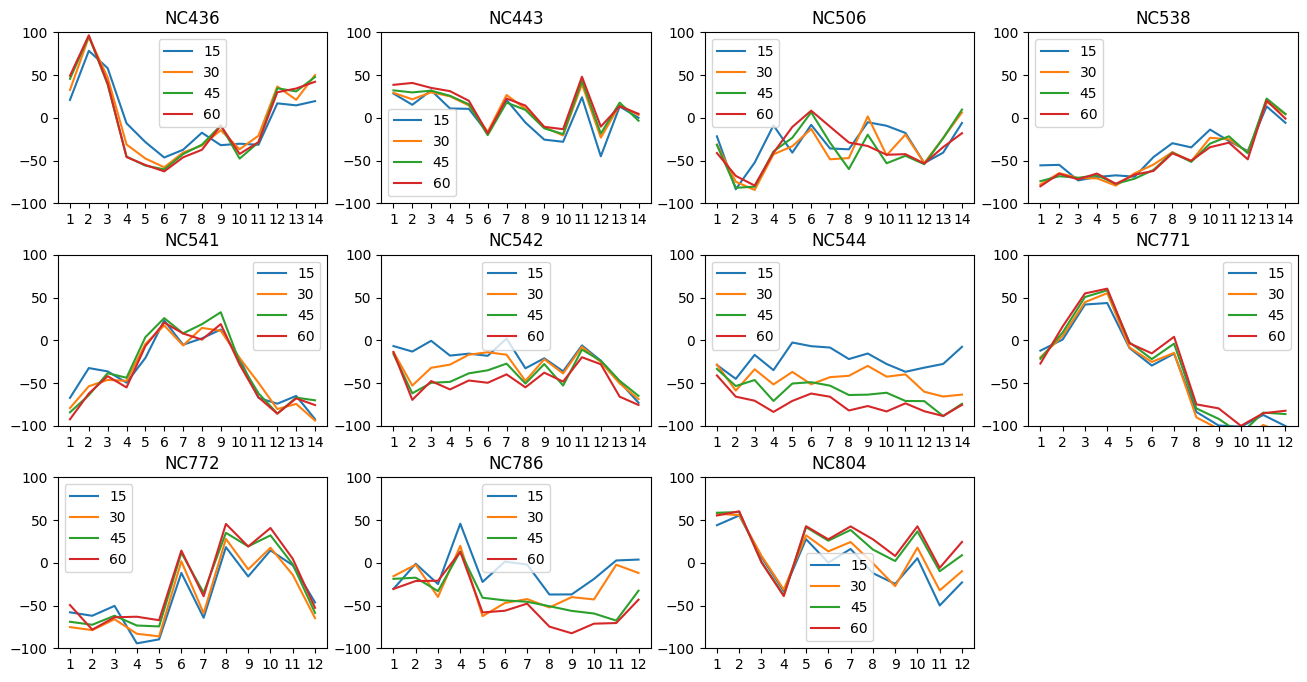

In [ ]:
plt.figure(figsize=(16,8))

for i in range(len(wild_labels)):
  # plt.figure(figsize=(8,6))
  plt.subplot(3, 4, i+1)
  plt.xticks(x, days)
  plt.ylim(-100, 100)
  plt.plot(wild_individual[i].LX_fup15, label='15')
  plt.plot(wild_individual[i].LX_fup30, label='30')
  plt.plot(wild_individual[i].LX_fup45, label='45')
  plt.plot(wild_individual[i].LX_fup60, label='60')
  plt.title(wild_labels[i])
  plt.legend()

plt.subplots_adjust(hspace=0.3)
plt.show()

### RX up diffs

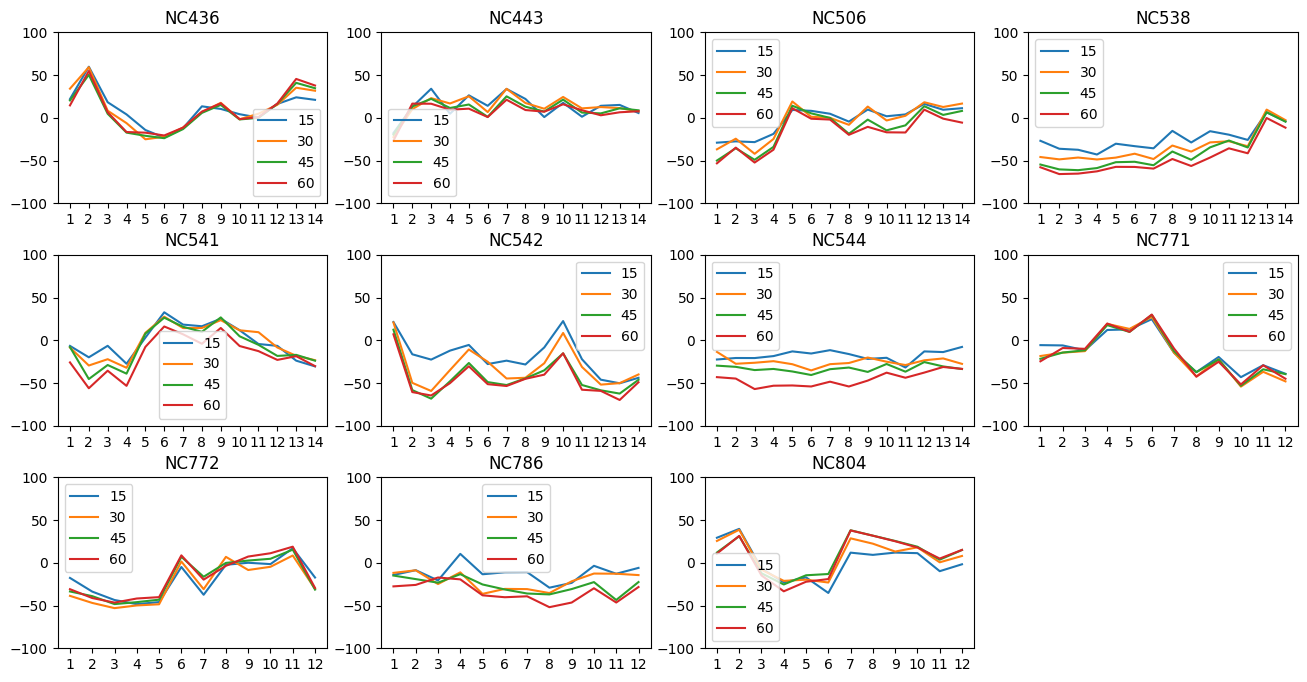

In [ ]:
plt.figure(figsize=(16,8))
for i in range(len(wild_labels)):
  # plt.figure(figsize=(8,6))
  plt.subplot(3, 4, i+1)
  plt.xticks(x, days)
  plt.ylim(-100, 100)
  plt.plot(wild_individual[i].RX_fup15, label='15')
  plt.plot(wild_individual[i].RX_fup30, label='30')
  plt.plot(wild_individual[i].RX_fup45, label='45')
  plt.plot(wild_individual[i].RX_fup60, label='60')
  plt.title(wild_labels[i])
  plt.legend()
plt.subplots_adjust(hspace=0.3)
plt.show()

### LX down diffs

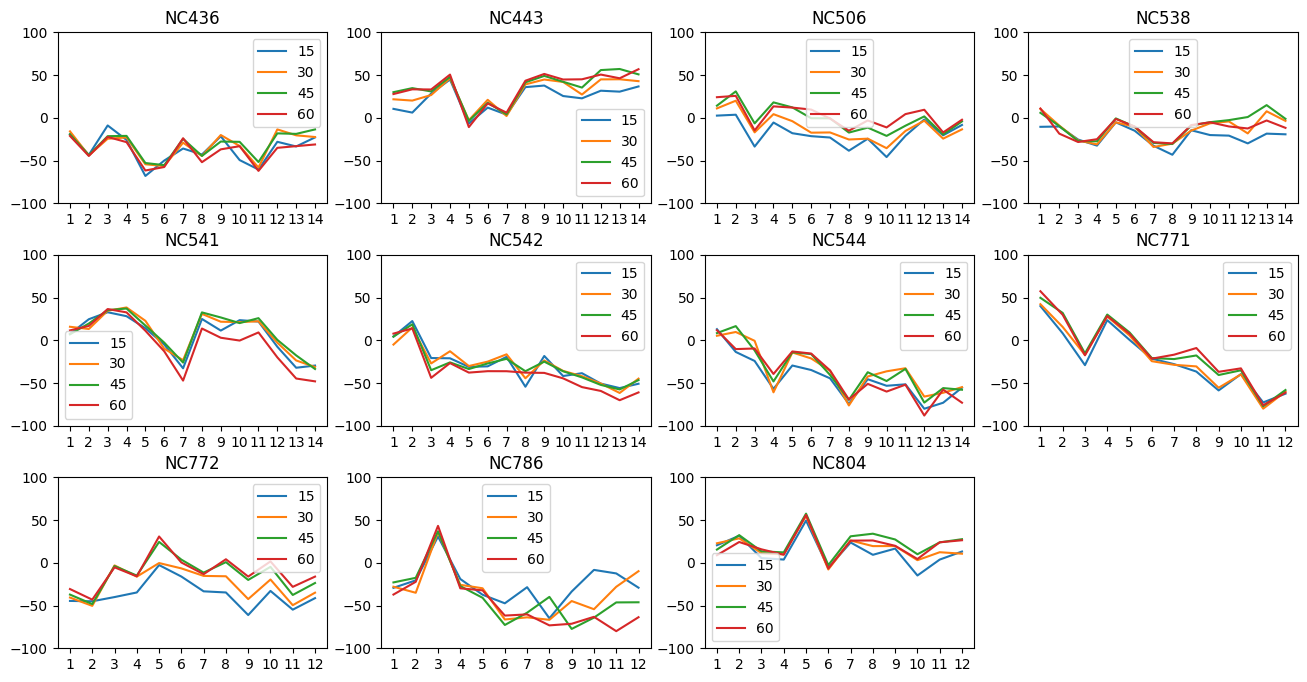

In [ ]:
plt.figure(figsize=(16,8))
for i in range(len(wild_labels)):
  # plt.figure(figsize=(8,6))
  plt.subplot(3, 4, i+1)
  plt.xticks(x, days)
  plt.ylim(-100, 100)
  plt.plot(wild_individual[i].LX_fdown15, label='15')
  plt.plot(wild_individual[i].LX_fdown30, label='30')
  plt.plot(wild_individual[i].LX_fdown45, label='45')
  plt.plot(wild_individual[i].LX_fdown60, label='60')
  plt.title(wild_labels[i])
  plt.legend()
plt.subplots_adjust(hspace=0.3)
plt.show()

### RX down diffs

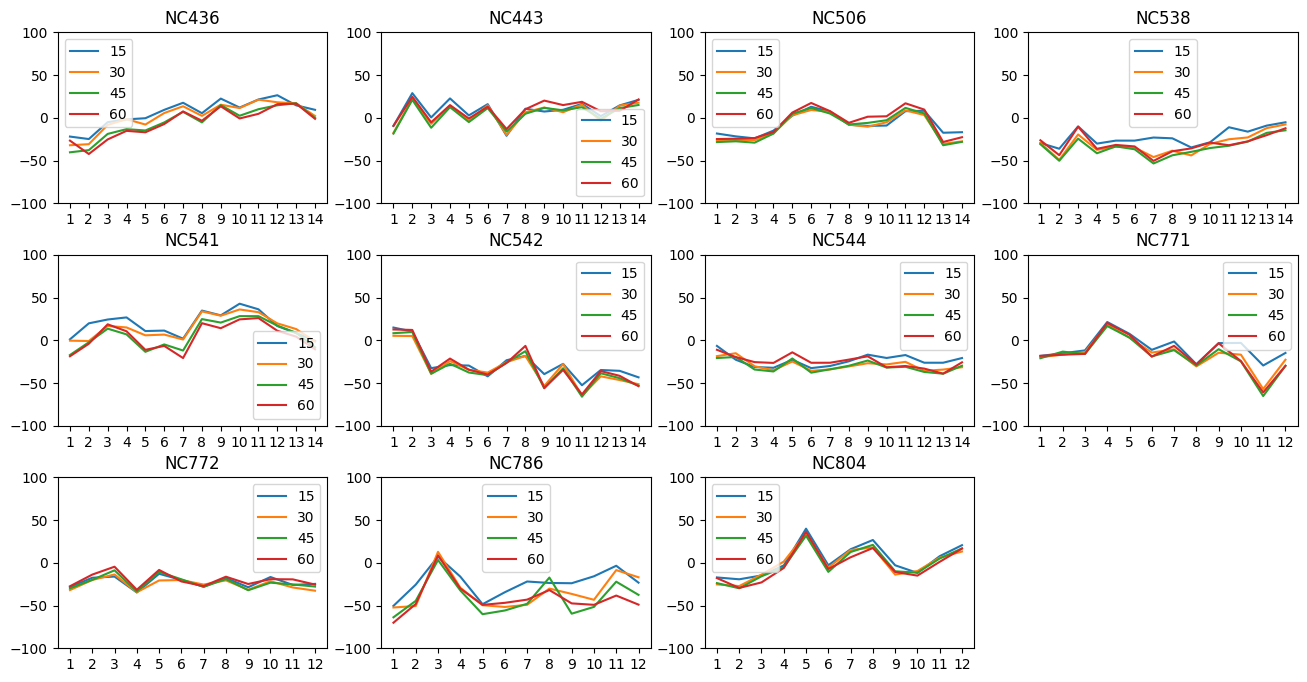

In [ ]:
plt.figure(figsize=(16,8))
for i in range(len(wild_labels)):
  # plt.figure(figsize=(8,6))
  plt.subplot(3, 4, i+1)
  plt.xticks(x, days)
  plt.ylim(-100, 100)
  plt.plot(wild_individual[i].RX_fdown15, label='15')
  plt.plot(wild_individual[i].RX_fdown30, label='30')
  plt.plot(wild_individual[i].RX_fdown45, label='45')
  plt.plot(wild_individual[i].RX_fdown60, label='60')
  plt.title(wild_labels[i])
  plt.legend()
plt.subplots_adjust(hspace=0.3)
plt.show()

## Rett Mice

### LX up diffs

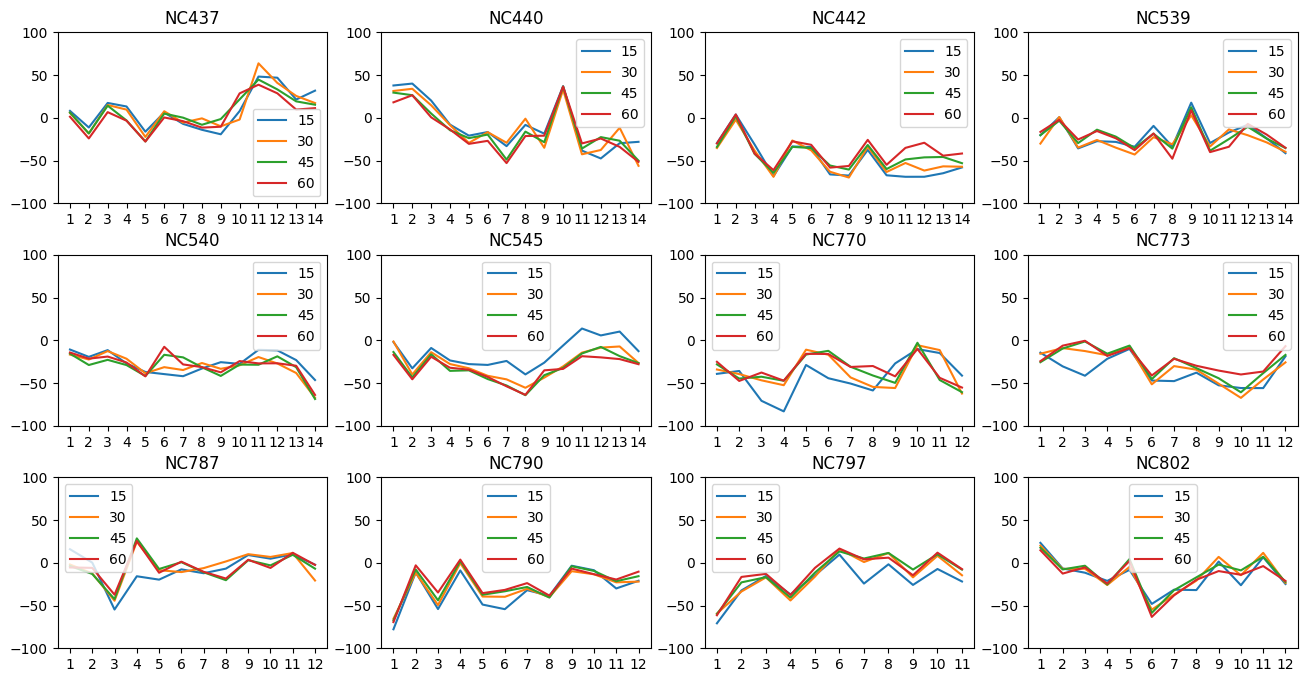

In [ ]:
rett_labels = ['NC437', 'NC440', 'NC442', 'NC539', 'NC540', 'NC545', 'NC770', 'NC773', 'NC787', 'NC790', 'NC797', 'NC802']

plt.figure(figsize=(16,8))
for i in range(len(rett_labels)):
  # plt.figure(figsize=(8,6))
  plt.subplot(3, 4, i+1)
  plt.xticks(x, days)
  plt.ylim(-100, 100)
  plt.plot(rett_individual[i].LX_fup15, label = '15')
  plt.plot(rett_individual[i].LX_fup30, label = '30')
  plt.plot(rett_individual[i].LX_fup45, label = '45')
  plt.plot(rett_individual[i].LX_fup60, label = '60')
  plt.title(rett_labels[i])
  plt.legend()
plt.subplots_adjust(hspace=0.3)
plt.show()



### RX up diffs

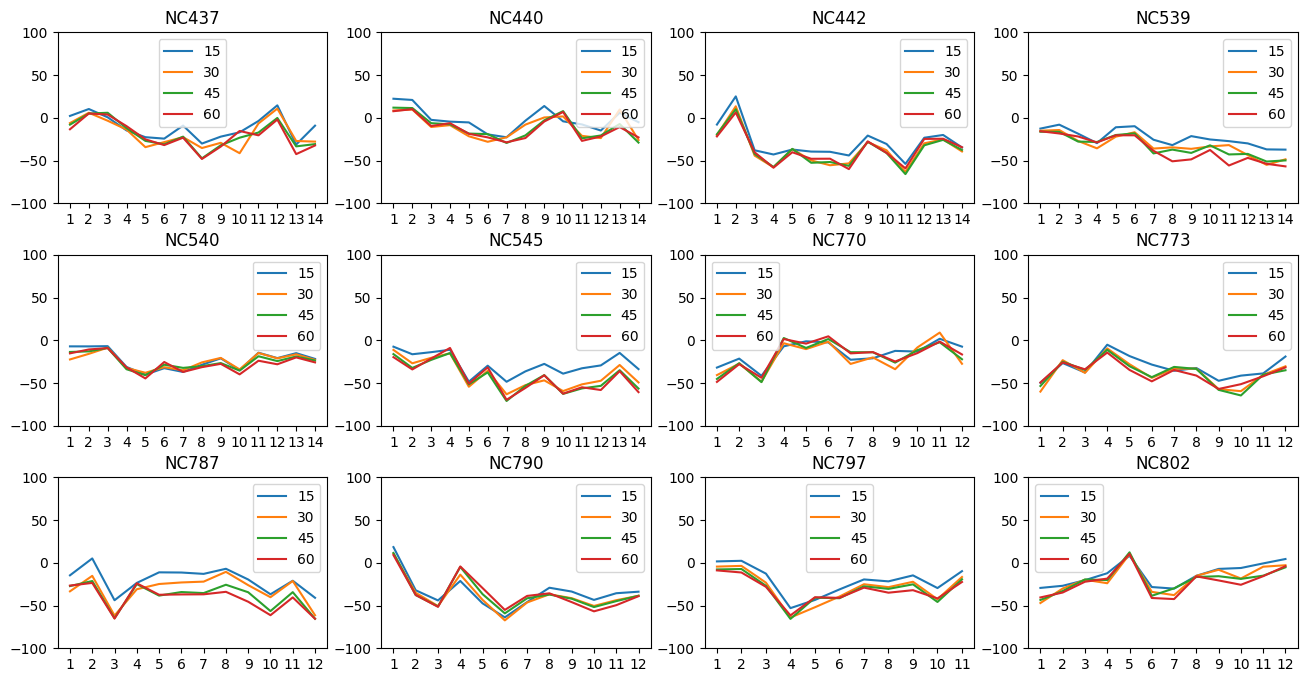

In [ ]:
plt.figure(figsize=(16,8))
for i in range(len(rett_labels)):
  # plt.figure(figsize=(8,6))
  plt.subplot(3, 4, i+1)
  plt.xticks(x, days)
  plt.ylim(-100, 100)
  plt.plot(rett_individual[i].RX_fup15, label = '15')
  plt.plot(rett_individual[i].RX_fup30, label = '30')
  plt.plot(rett_individual[i].RX_fup45, label = '45')
  plt.plot(rett_individual[i].RX_fup60, label = '60')
  plt.title(rett_labels[i])
  plt.legend()
plt.subplots_adjust(hspace=0.3)
plt.show()


### LX down diffs

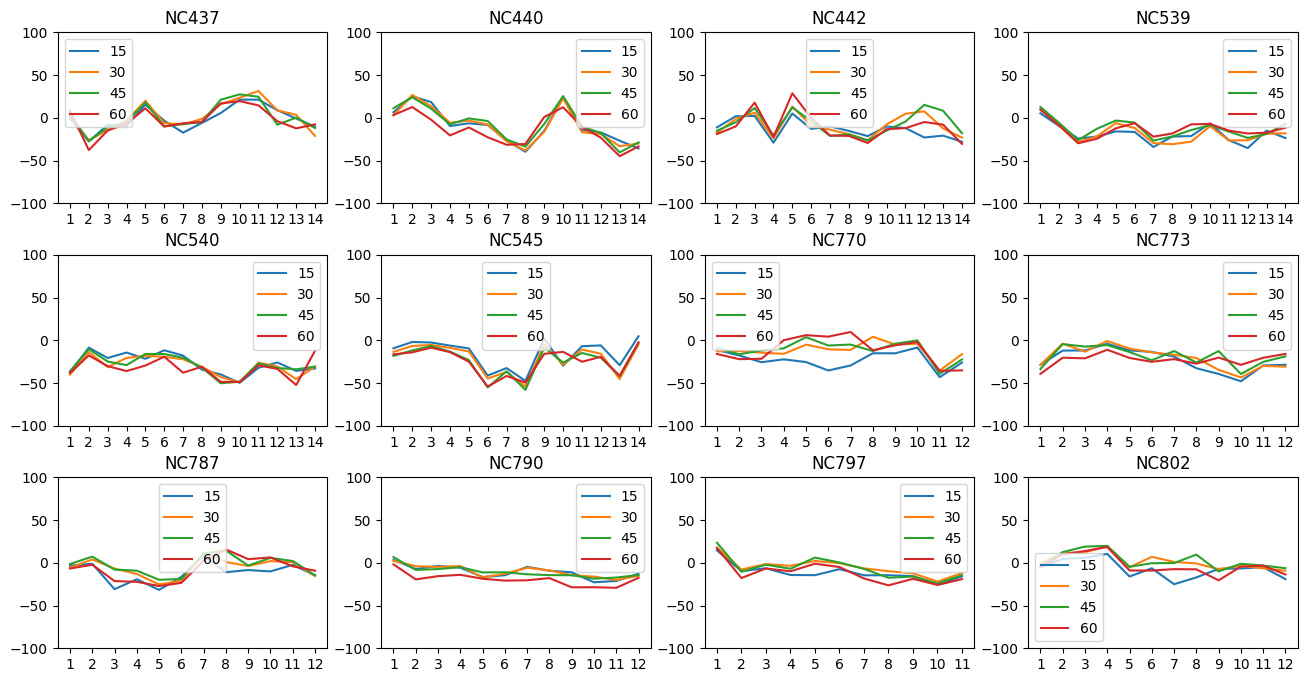

In [ ]:
plt.figure(figsize=(16,8))
for i in range(len(rett_labels)):
  # plt.figure(figsize=(8,6))
  plt.subplot(3, 4, i+1)
  plt.xticks(x, days)
  plt.ylim(-100, 100)
  plt.plot(rett_individual[i].LX_fdown15, label = '15')
  plt.plot(rett_individual[i].LX_fdown30, label = '30')
  plt.plot(rett_individual[i].LX_fdown45, label = '45')
  plt.plot(rett_individual[i].LX_fdown60, label = '60')
  plt.title(rett_labels[i])
  plt.legend()
plt.subplots_adjust(hspace=0.3)
plt.show()


### RX down diffs

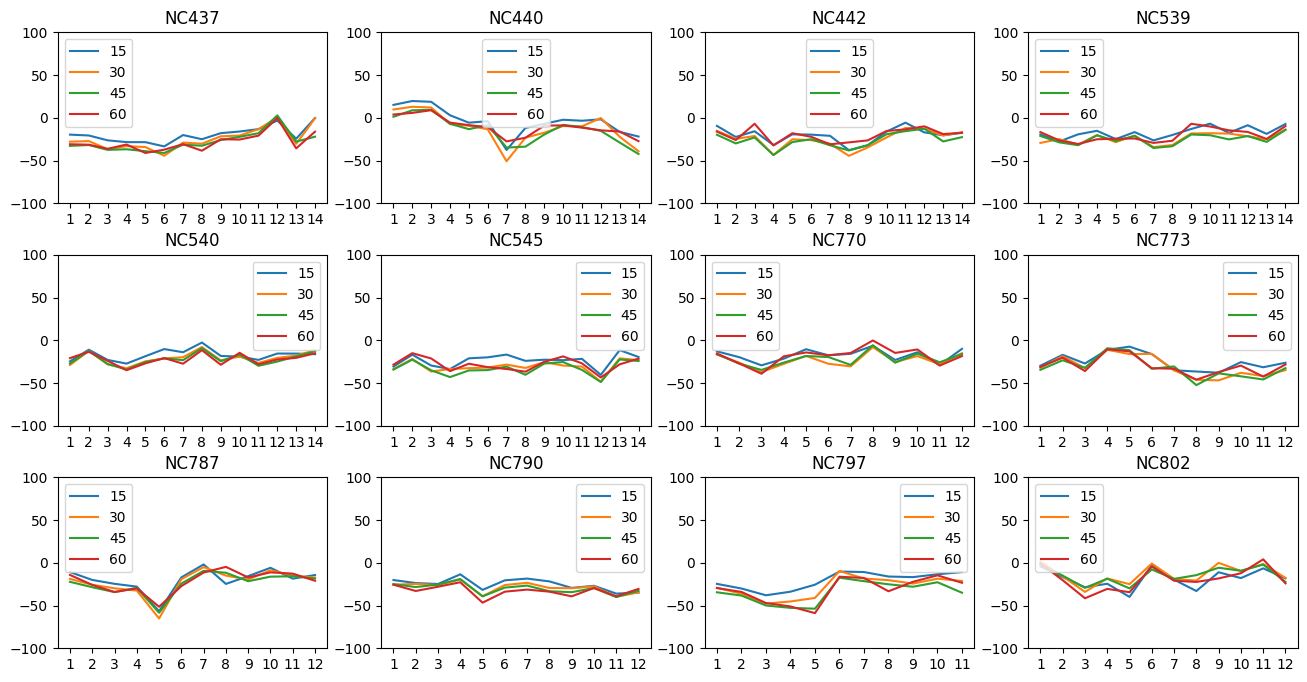

In [ ]:
plt.figure(figsize=(16,8))
for i in range(len(rett_labels)):
  # plt.figure(figsize=(8,6))
  plt.subplot(3, 4, i+1)
  plt.xticks(x, days)
  plt.ylim(-100, 100)
  plt.plot(rett_individual[i].RX_fdown15, label = '15')
  plt.plot(rett_individual[i].RX_fdown30, label = '30')
  plt.plot(rett_individual[i].RX_fdown45, label = '45')
  plt.plot(rett_individual[i].RX_fdown60, label = '60')
  plt.title(rett_labels[i])
  plt.legend()
plt.subplots_adjust(hspace=0.3)
plt.show()


# Moments

In [ ]:
# 772 12days
# 786 12days
# 804 12days

normal_wild_labels = ['NC436', 'NC443', 'NC506', 'NC538', 'NC541', 'NC542', 'NC544']
normal_wild = [std_mean_436, std_mean_443, std_mean_506, std_mean_538, std_mean_541, std_mean_542, std_mean_544]

short_wild_labels = ['NC771','NC772', 'NC786', 'NC804']
short_wild = [std_mean_771, std_mean_772, std_mean_786, std_mean_804]

In [ ]:
# 770 12days
# 773 12days
# 787 12days
# 790 12days
# 797 11days
# 802 12days

normal_rett_labels = ['NC437', 'NC440', 'NC442', 'NC539', 'NC540', 'NC545']
normal_rett = [std_mean_437, std_mean_440, std_mean_442, std_mean_539, std_mean_540, std_mean_545]

short_rett_labels = ['NC770', 'NC773', 'NC787', 'NC790', 'NC802']
short_rett = [std_mean_770, std_mean_773, std_mean_787, std_mean_790, std_mean_802]

shorter_rett_labels = ['NC797']
shorter_rett = [std_mean_797]

In [ ]:
def mean_std_plots(wild_mean_std, rett_mean_std, pos, std_or_mean):

  X = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14']

  plt.figure(figsize=(30,8))
  c = 0

  for i in list(wild_mean_std.columns):

    plt.subplot(1, 5, c+1)

    wild = wild_mean_std[i]
    rett = rett_mean_std[i]

    X_axis = np.arange(len(X))

    plt.bar(X_axis - 0.2, wild, 0.3, label = 'Wild')
    plt.bar(X_axis + 0.2, rett, 0.3, label = 'Rett')

    plt.xticks(X_axis, X)
    plt.ylim(0, 300)
    plt.xlabel("Days")
    plt.ylabel("Coordinate")
    if std_or_mean == 'mean':
      plt.title("Means of " + pos + " for Wild/Rett at " + i[:-5])
      plt.ylim(0, 300)
    elif std_or_mean == 'std':
      plt.title('Stds of ' + pos + ' for Wild/Rett at ' + i[:-4])
      plt.ylim(0, 30)
    plt.legend()

    c += 1
  
  plt.show()

## Mean_Methods

In [ ]:
def build_wild_up_mean_dataframe(ind):
  
  mean_df = pd.DataFrame()

  for i in ['fup0','fup15','fup30','fup45','fup60']:

    normal_wild_df = pd.DataFrame()
    for ii in range(len(normal_wild_labels)):
      normal_wild_df[normal_wild_labels[ii]] = np.array(normal_wild[ii][ind][i])

    short_wild_df = pd.DataFrame()
    for ii in range(len(short_wild_labels)):
      short_wild_df[short_wild_labels[ii]] = np.array(short_wild[ii][ind][i])

    new = pd.concat([normal_wild_df, short_wild_df], axis=1) 
    new = new.interpolate(method = 'spline', order=1)

    mean_df[i+'_mean'] = new.mean(axis=1)
    
  return mean_df

def build_wild_down_mean_dataframe(ind):
  
  mean_df = pd.DataFrame()

  for i in ['fdown0','fdown15','fdown30','fdown45','fdown60']:

    normal_wild_df = pd.DataFrame()
    for ii in range(len(normal_wild_labels)):
      normal_wild_df[normal_wild_labels[ii]] = np.array(normal_wild[ii][ind][i])

    short_wild_df = pd.DataFrame()
    for ii in range(len(short_wild_labels)):
      short_wild_df[short_wild_labels[ii]] = np.array(short_wild[ii][ind][i])

    new = pd.concat([normal_wild_df, short_wild_df], axis=1) 
    new = new.interpolate(method = 'spline', order=1)

    mean_df[i+'_mean'] = new.mean(axis=1)
    
  return mean_df

In [ ]:
def build_rett_up_mean_dataframe(ind):
  
  mean_df = pd.DataFrame()

  for i in ['fup0','fup15','fup30','fup45','fup60']:

    normal_rett_df = pd.DataFrame()
    for ii in range(len(normal_rett_labels)):
      normal_rett_df[normal_rett_labels[ii]] = np.array(normal_rett[ii][ind][i])

    short_rett_df = pd.DataFrame()
    for ii in range(len(short_rett_labels)):
      short_rett_df[short_rett_labels[ii]] = np.array(short_rett[ii][ind][i])

    shorter_rett_df = pd.DataFrame()
    for ii in range(len(shorter_rett_labels)):
      shorter_rett_df[shorter_rett_labels[ii]] = np.array(shorter_rett[ii][ind][i])

    new = pd.concat([normal_rett_df, short_rett_df], axis=1) 
    new = pd.concat([new, shorter_rett_df], axis=1)
    new = new.interpolate(method = 'spline', order=1)

    mean_df[i+'_mean'] = new.mean(axis=1)
    
  return mean_df



def build_rett_down_mean_dataframe(ind):
  
  mean_df = pd.DataFrame()

  for i in ['fdown60','fdown45','fdown30','fdown15','fdown0']:

    normal_rett_df = pd.DataFrame()
    for ii in range(len(normal_rett_labels)):
      normal_rett_df[normal_rett_labels[ii]] = np.array(normal_rett[ii][ind][i])

    short_rett_df = pd.DataFrame()
    for ii in range(len(short_rett_labels)):
      short_rett_df[short_rett_labels[ii]] = np.array(short_rett[ii][ind][i])

    shorter_rett_df = pd.DataFrame()
    for ii in range(len(shorter_rett_labels)):
      shorter_rett_df[shorter_rett_labels[ii]] = np.array(shorter_rett[ii][ind][i])

    new = pd.concat([normal_rett_df, short_rett_df], axis=1) 
    new = pd.concat([new, shorter_rett_df], axis=1)
    new = new.interpolate(method = 'spline', order=1)

    mean_df[i+'_mean'] = new.mean(axis=1)
    
  return mean_df

In [ ]:
Wild_up_LX_Mean = build_wild_up_mean_dataframe(8)
Wild_up_RX_Mean = build_wild_up_mean_dataframe(9)
Wild_down_LX_Mean = build_wild_down_mean_dataframe(12)
Wild_down_RX_Mean = build_wild_down_mean_dataframe(13)

Rett_up_LX_Mean = build_rett_up_mean_dataframe(8)
Rett_up_RX_Mean = build_rett_up_mean_dataframe(9)
Rett_down_LX_Mean = build_rett_down_mean_dataframe(12)
Rett_down_RX_Mean = build_rett_down_mean_dataframe(13)

## LX

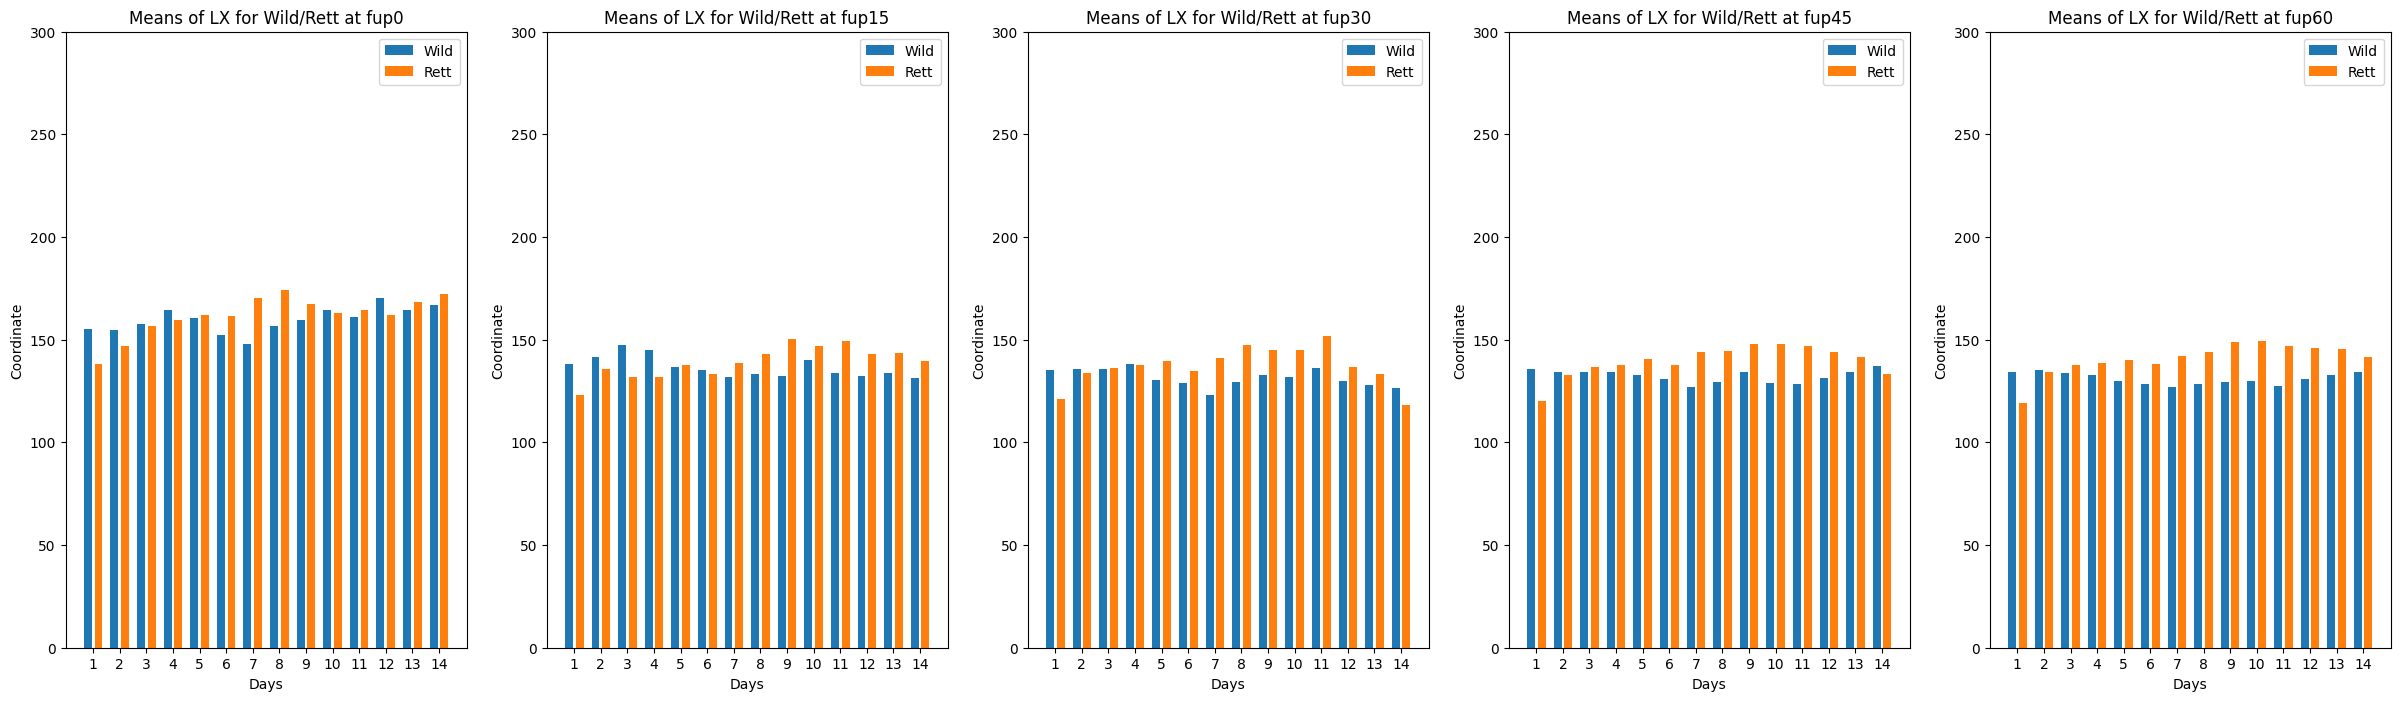

In [ ]:
mean_std_plots(Wild_up_LX_Mean, Rett_up_LX_Mean, 'LX', 'mean')

## Variance Methods

In [ ]:
def build_wild_up_std_dataframe(ind):
  
  std_df = pd.DataFrame()

  for i in ['fup0','fup15','fup30','fup45','fup60']:

    normal_wild_df = pd.DataFrame()
    for ii in range(len(normal_wild_labels)):
      normal_wild_df[normal_wild_labels[ii]] = np.array(normal_wild[ii][ind][i])

    short_wild_df = pd.DataFrame()
    for ii in range(len(short_wild_labels)):
      short_wild_df[short_wild_labels[ii]] = np.array(short_wild[ii][ind][i])

    new = pd.concat([normal_wild_df, short_wild_df], axis=1) 
    new = new.interpolate(method = 'spline', order=1)
    new = new**2

    std_df[i+'_std'] = new.sum(axis=1)
    
  return std_df**0.5

def build_wild_down_std_dataframe(ind):
  
  std_df = pd.DataFrame()

  for i in ['fdown0','fdown15','fdown30','fdown45','fdown60']:

    normal_wild_df = pd.DataFrame()
    for ii in range(len(normal_wild_labels)):
      normal_wild_df[normal_wild_labels[ii]] = np.array(normal_wild[ii][ind][i])

    short_wild_df = pd.DataFrame()
    for ii in range(len(short_wild_labels)):
      short_wild_df[short_wild_labels[ii]] = np.array(short_wild[ii][ind][i])

    new = pd.concat([normal_wild_df, short_wild_df], axis=1) 
    new = new.interpolate(method = 'spline', order=1)
    new = new**2

    std_df[i+'_std'] = new.sum(axis=1)
    
  return std_df**0.5

In [ ]:
def build_rett_up_std_dataframe(ind):
  
  std_df = pd.DataFrame()

  for i in ['fup0','fup15','fup30','fup45','fup60']:

    normal_rett_df = pd.DataFrame()
    for ii in range(len(normal_rett_labels)):
      normal_rett_df[normal_rett_labels[ii]] = np.array(normal_rett[ii][ind][i])

    short_rett_df = pd.DataFrame()
    for ii in range(len(short_rett_labels)):
      short_rett_df[short_rett_labels[ii]] = np.array(short_rett[ii][ind][i])

    shorter_rett_df = pd.DataFrame()
    for ii in range(len(shorter_rett_labels)):
      shorter_rett_df[shorter_rett_labels[ii]] = np.array(shorter_rett[ii][ind][i])

    new = pd.concat([normal_rett_df, short_rett_df], axis=1) 
    new = pd.concat([new, shorter_rett_df], axis=1)
    new = new.interpolate(method = 'spline', order=1)
    new = new**2

    std_df[i+'_std'] = new.sum(axis=1)
    
  return std_df**0.5



def build_rett_down_std_dataframe(ind):
  
  std_df = pd.DataFrame()

  for i in ['fdown60','fdown45','fdown30','fdown15','fdown0']:

    normal_rett_df = pd.DataFrame()
    for ii in range(len(normal_rett_labels)):
      normal_rett_df[normal_rett_labels[ii]] = np.array(normal_rett[ii][ind][i])

    short_rett_df = pd.DataFrame()
    for ii in range(len(short_rett_labels)):
      short_rett_df[short_rett_labels[ii]] = np.array(short_rett[ii][ind][i])

    shorter_rett_df = pd.DataFrame()
    for ii in range(len(shorter_rett_labels)):
      shorter_rett_df[shorter_rett_labels[ii]] = np.array(shorter_rett[ii][ind][i])

    new = pd.concat([normal_rett_df, short_rett_df], axis=1) 
    new = pd.concat([new, shorter_rett_df], axis=1)
    new = new.interpolate(method = 'spline', order=1)
    new = new**2

    std_df[i+'_std'] = new.sum(axis=1)
    
  return std_df**0.5

In [ ]:
Wild_up_LX_std = build_wild_up_std_dataframe(0)
Wild_up_RX_std = build_wild_up_std_dataframe(1)
Wild_down_LX_std = build_wild_down_std_dataframe(4)
Wild_down_RX_std = build_wild_down_std_dataframe(5)

Rett_up_LX_std = build_rett_up_std_dataframe(0)
Rett_up_RX_std = build_rett_up_std_dataframe(1)
Rett_down_LX_std = build_rett_down_std_dataframe(4)
Rett_down_RX_std = build_rett_down_std_dataframe(5)

In [ ]:
Wild_up_LX_std

,fup0_std,fup15_std,fup30_std,fup45_std,fup60_std
0,60.194624,88.981274,83.498464,64.715091,53.011098
1,65.826796,84.298266,71.914730,57.781987,54.266827
2,84.190147,85.692312,74.709371,56.959233,49.429713
3,98.043311,90.091477,83.221317,67.215697,50.170528
4,59.313389,74.436041,68.633033,59.455105,50.336692
5,60.215228,67.710299,67.298120,62.806766,55.527132
6,54.404033,70.902291,67.398624,63.752763,55.919306
7,85.999531,76.205731,66.041034,62.420586,56.314287
8,67.767569,69.876678,67.802650,67.542603,56.188994
9,46.716096,68.125282,62.989962,64.480577,55.135241


In [ ]:
def std_plots(wild_mean_std, rett_mean_std, pos, std_or_mean):

  X = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14']

  plt.figure(figsize=(30,8))
  c = 0

  for i in list(wild_mean_std.columns):

    plt.subplot(1, 5, c+1)

    wild = wild_mean_std[i]
    rett = rett_mean_std[i]

    X_axis = np.arange(len(X))

    plt.plot(wild, label = 'Wild')
    plt.plot(rett, label = 'Rett')

    plt.xticks(X_axis, X)
    #plt.ylim(0, 300)
    plt.xlabel("Days")
    plt.ylabel("Coordinate")
  
    if std_or_mean == 'std':
      plt.title('Stds of ' + pos + ' for Wild/Rett at ' + i[:-4])
      #plt.ylim(0, 30)
    plt.legend()

    c += 1
  
  plt.show()

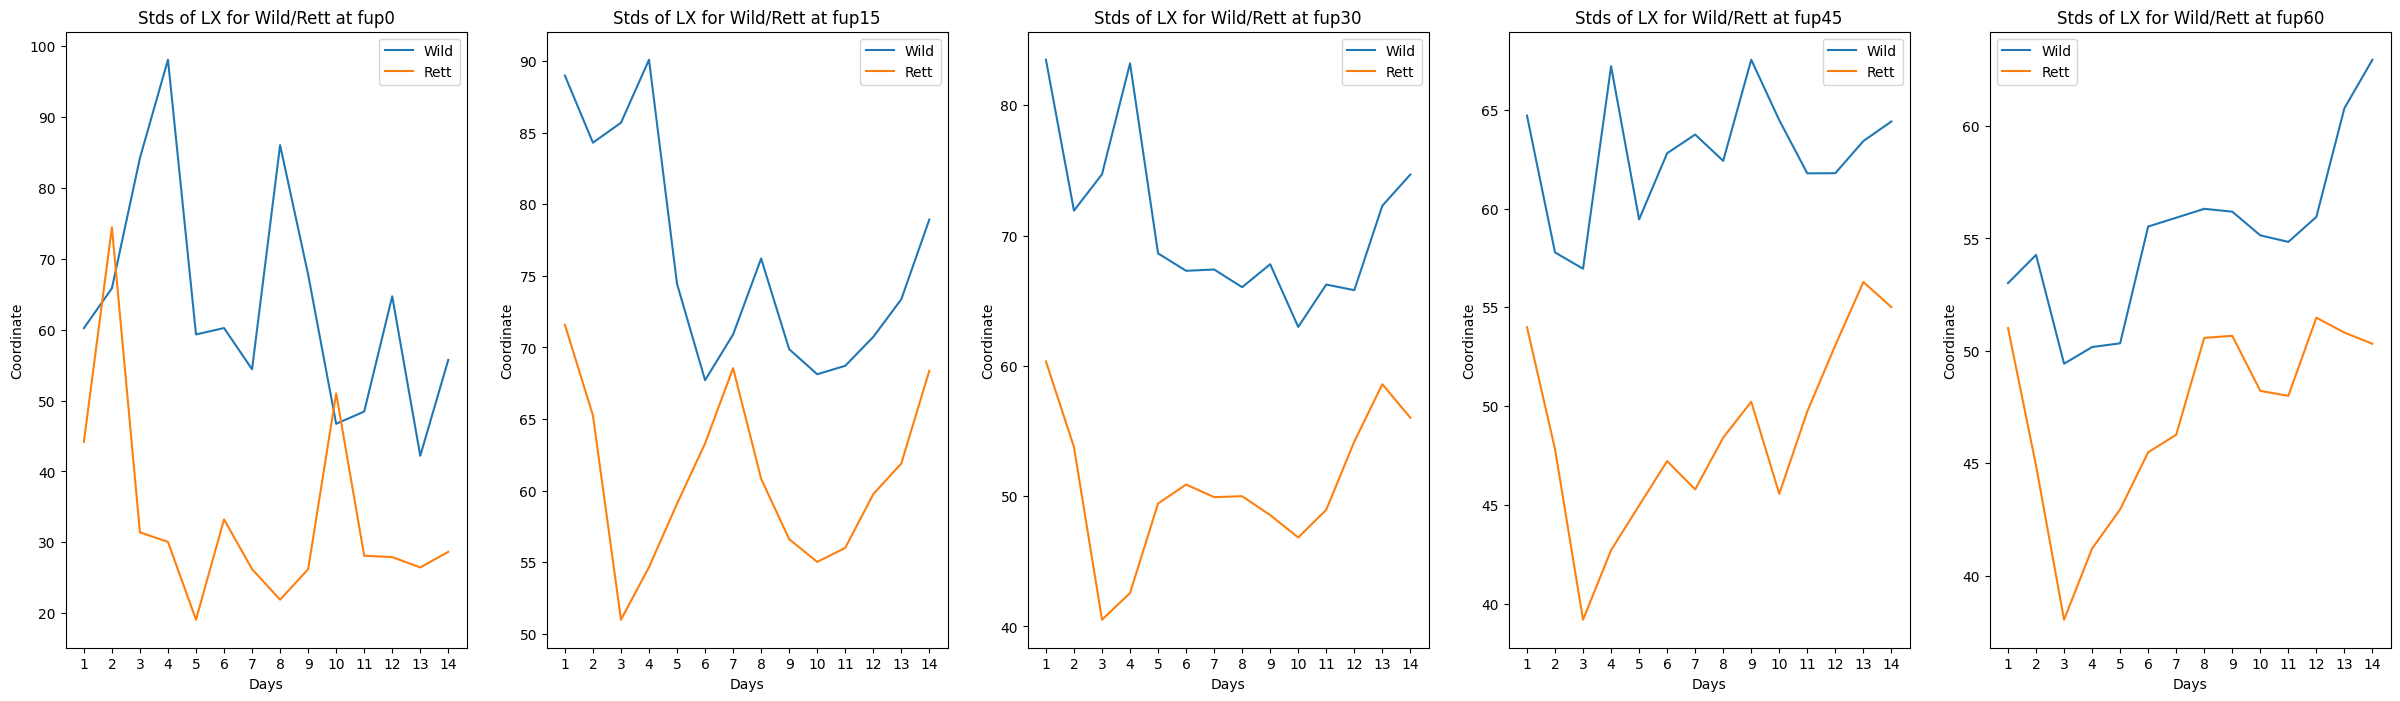

In [ ]:
std_plots(Wild_up_LX_std, Rett_up_LX_std, 'LX', 'std')

# Try New things

In [ ]:

wild_list = ['NC436-M-WT', 'NC443-M-WT', 'NC506-M-WT', 'NC538-M-WT', 'NC541-M-WT', 'NC542-M-WT', 'NC544-M-WT', 'NC771-M-WT', 'NC772-M-WT', 'NC786-M-WT', 'NC804-M-WT']
rett_list = ['NC437-M-NL', 'NC440-M-NL', 'NC442-M-NL', 'NC539-M-NL', 'NC540-M-NL', 'NC545-M-NL', 'NC770-M-NL', 'NC773-M-NL', 'NC787-M-NL', 'NC790-M-NL', 'NC802-M-NL']


def LX_col(wb, speed, day, mouse):
    # read the paw movement data
    sample = pd.read_excel(wb, speed+' pawMovement').iloc[:,1:]
    LX = sample.iloc[:,0]
    LX = np.rint(LX.to_numpy())
    return LX

def RX_col(wb, speed, day, mouse):
    # read the paw movement data
    sample = pd.read_excel(wb, speed+' pawMovement').iloc[:,1:]
    RX = sample.iloc[:,2]
    RX = np.rint(RX.to_numpy())
    return RX

def speed_dataframes(wild_or_rett, speed):

  days = ['1','2','3','4','5','6','7','8','9','10']

  temp_lx = pd.DataFrame()
  temp_rx = pd.DataFrame()

  for ii in days:

    LX_df = np.array([1])
    RX_df = np.array([1])

    for i in wild_or_rett:

      basename = '{mouse}-Day{day}_aligned.xlsx'.format(mouse = i, day=ii)
      PN_WB = pd.ExcelFile(curr+i+' alignedNeuronPaw/'+basename) #curr and abspath_curr

      LX_data = LX_col(PN_WB, speed, ii, i)
      RX_data = RX_col(PN_WB, speed, ii, i)
  
      LX_df = np.concatenate((LX_df, LX_data))
      RX_df = np.concatenate((RX_df, RX_data))

    temp_lx[ii] = LX_df[1:]
    temp_rx[ii] = RX_df[1:]

  return temp_lx, temp_rx

In [ ]:
wild_fup0_lx = speed_dataframes(wild_list, 'fup0')[0]
wild_fup0_rx = speed_dataframes(wild_list, 'fup0')[1]

wild_fup15_lx = speed_dataframes(wild_list, 'fup15')[0]
wild_fup15_rx = speed_dataframes(wild_list, 'fup15')[1]

wild_fup30_lx = speed_dataframes(wild_list, 'fup30')[0]
wild_fup30_rx = speed_dataframes(wild_list, 'fup30')[1]

wild_fup45_lx = speed_dataframes(wild_list, 'fup45')[0]
wild_fup45_rx = speed_dataframes(wild_list, 'fup45')[1]

wild_fup60_lx = speed_dataframes(wild_list, 'fup60')[0]
wild_fup60_rx = speed_dataframes(wild_list, 'fup60')[1]


rett_fup0_lx = speed_dataframes(rett_list, 'fup0')[0]
rett_fup0_rx = speed_dataframes(rett_list, 'fup0')[1]

rett_fup15_lx = speed_dataframes(rett_list, 'fup15')[0]
rett_fup15_rx = speed_dataframes(rett_list, 'fup15')[1]

rett_fup30_lx = speed_dataframes(rett_list, 'fup30')[0]
rett_fup30_rx = speed_dataframes(rett_list, 'fup30')[1]

rett_fup45_lx = speed_dataframes(rett_list, 'fup45')[0]
rett_fup45_rx = speed_dataframes(rett_list, 'fup45')[1]

rett_fup60_lx = speed_dataframes(rett_list, 'fup60')[0]
rett_fup60_rx = speed_dataframes(rett_list, 'fup60')[1]

In [ ]:
rett_fup30_rx = speed_dataframes(rett_list, 'fup30')[1]

In [ ]:
wild_fdown0_lx = speed_dataframes(wild_list, 'fdown0')[0]
wild_fdown0_rx = speed_dataframes(wild_list, 'fdown0')[1]

wild_fdown15_lx = speed_dataframes(wild_list, 'fdown15')[0]
wild_fdown15_rx = speed_dataframes(wild_list, 'fdown15')[1]

wild_fdown30_lx = speed_dataframes(wild_list, 'fdown30')[0]
wild_fdown30_rx = speed_dataframes(wild_list, 'fdown30')[1]

wild_fdown45_lx = speed_dataframes(wild_list, 'fdown45')[0]
wild_fdown45_rx = speed_dataframes(wild_list, 'fdown45')[1]

wild_fdown60_lx = speed_dataframes(wild_list, 'fdown60')[0]
wild_fdown60_rx = speed_dataframes(wild_list, 'fdown60')[1]


rett_fdown0_lx = speed_dataframes(rett_list, 'fdown0')[0]
rett_fdown0_rx = speed_dataframes(rett_list, 'fdown0')[1]

rett_fdown15_lx = speed_dataframes(rett_list, 'fdown15')[0]
rett_fdown15_rx = speed_dataframes(rett_list, 'fdown15')[1]

rett_fdown30_lx = speed_dataframes(rett_list, 'fdown30')[0]
rett_fdown30_rx = speed_dataframes(rett_list, 'fdown30')[1]

rett_fdown45_lx = speed_dataframes(rett_list, 'fdown45')[0]
rett_fdown45_rx = speed_dataframes(rett_list, 'fdown45')[1]

rett_fdown60_lx = speed_dataframes(rett_list, 'fdown60')[0]
rett_fdown60_rx = speed_dataframes(rett_list, 'fdown60')[1]

In [ ]:
wild_fdown0_lx = pd.read_csv('wild_fdown0_lx.csv')
wild_fdown0_rx = pd.read_csv('wild_fdown0_rx.csv')

wild_fdown15_lx = pd.read_csv('wild_fdown15_lx.csv')
wild_fdown15_rx = pd.read_csv('wild_fdown15_rx.csv')

wild_fdown30_lx = pd.read_csv('wild_fdown30_lx.csv')
wild_fdown30_rx = pd.read_csv('wild_fdown30_rx.csv')

wild_fdown45_lx = pd.read_csv('wild_fdown45_lx.csv')
wild_fdown45_rx = pd.read_csv('wild_fdown45_rx.csv')

wild_fdown60_lx = pd.read_csv('wild_fdown60_lx.csv')
wild_fdown60_rx = pd.read_csv('wild_fdown60_rx.csv')


rett_fdown0_lx = pd.read_csv('rett_fdown0_lx.csv')
rett_fdown0_rx = pd.read_csv('rett_fdown0_rx.csv')

rett_fdown15_lx = pd.read_csv('rett_fdown15_lx.csv')
rett_fdown15_rx = pd.read_csv('rett_fdown15_rx.csv')

rett_fdown30_lx = pd.read_csv('rett_fdown30_lx.csv')
rett_fdown30_rx = pd.read_csv('rett_fdown30_rx.csv')
#need rett fup30 rx csv

rett_fdown45_lx = pd.read_csv('rett_fdown45_lx.csv')
rett_fdown45_rx = pd.read_csv('rett_fdown45_rx.csv')

rett_fdown60_lx = pd.read_csv('rett_fdown60_lx.csv')
rett_fdown60_rx = pd.read_csv('rett_fdown60_rx.csv')

In [ ]:
wild_fup0_lx = pd.read_csv('wild_fup0_lx.csv')
wild_fup0_rx = pd.read_csv('wild_fup0_rx.csv')

wild_fup15_lx = pd.read_csv('wild_fup15_lx.csv')
wild_fup15_rx = pd.read_csv('wild_fup15_rx.csv')

wild_fup30_lx = pd.read_csv('wild_fup30_lx.csv')
wild_fup30_rx = pd.read_csv('wild_fup30_rx.csv')

wild_fup45_lx = pd.read_csv('wild_fup45_lx.csv')
wild_fup45_rx = pd.read_csv('wild_fup45_rx.csv')

wild_fup60_lx = pd.read_csv('wild_fup60_lx.csv')
wild_fup60_rx = pd.read_csv('wild_fup60_rx.csv')


rett_fup0_lx = pd.read_csv('rett_fup0_lx.csv')
rett_fup0_rx = pd.read_csv('rett_fup0_rx.csv')

rett_fup15_lx = pd.read_csv('rett_fup15_lx.csv')
rett_fup15_rx = pd.read_csv('rett_fup15_rx.csv')

rett_fup30_lx = pd.read_csv('rett_fup30_lx.csv')
#need rett fup30 rx csv

rett_fup45_lx = pd.read_csv('rett_fup45_lx.csv')
rett_fup45_rx = pd.read_csv('rett_fup45_rx.csv')

rett_fup60_lx = pd.read_csv('rett_fup60_lx.csv')
rett_fup60_rx = pd.read_csv('rett_fup60_rx.csv')

## Mean

In [ ]:
def mean_data(wild):

  df_wild = pd.DataFrame()

  X = ['1','2','3','4','5','6','7','8','9','10']

  means = []

  for i in X:
    wild_day_mean = np.mean(wild[i])
    means.append(wild_day_mean)

  return means


speed_list = ['fup0','fup15','fup30','fup45','fup60',
              'fdown60','fdown45','fdown30','fdown15','fdown0']

wild_up_lx = [wild_fup0_lx, wild_fup15_lx, wild_fup30_lx, wild_fup45_lx, wild_fup60_lx]
rett_up_lx = [rett_fup0_lx, rett_fup15_lx, rett_fup30_lx, rett_fup45_lx, rett_fup60_lx]

wild_up_rx = [wild_fup0_rx, wild_fup15_rx, wild_fup30_rx, wild_fup45_rx, wild_fup60_rx]
rett_up_rx = [rett_fup0_rx, rett_fup15_rx, rett_fup30_rx, rett_fup45_rx, rett_fup60_rx]

wild_down_lx = [wild_fdown0_lx, wild_fdown15_lx, wild_fdown30_lx, wild_fdown45_lx, wild_fdown60_lx]
rett_down_lx = [rett_fdown0_lx, rett_fdown15_lx, rett_fdown30_lx, rett_fdown45_lx, rett_fdown60_lx]

wild_down_rx = [wild_fdown0_rx, wild_fdown15_rx, wild_fdown30_rx, wild_fdown45_rx, wild_fdown60_rx]
rett_down_rx = [rett_fdown0_rx, rett_fdown15_rx, rett_fdown30_rx, rett_fdown45_rx, rett_fdown60_rx]



df_mean_wild_lx = pd.DataFrame()
for i in zip(speed_list, wild_up_lx + wild_down_lx):
  m = mean_data(i[1])
  df_mean_wild_lx[i[0]] = m

df_mean_rett_lx = pd.DataFrame()
for i in zip(speed_list, rett_up_lx + rett_down_lx):
  m = mean_data(i[1])
  df_mean_rett_lx[i[0]] = m

df_mean_wild_rx = pd.DataFrame()
for i in zip(speed_list, wild_up_rx + wild_down_rx):
  m = mean_data(i[1])
  df_mean_wild_rx[i[0]] = m

df_mean_rett_rx = pd.DataFrame()
for i in zip(speed_list, rett_up_rx + rett_down_rx):
  m = mean_data(i[1])
  df_mean_rett_rx[i[0]] = m

In [ ]:
up_list = ['fup0','fup15','fup30','fup45','fup60']
down_list = ['fdown60','fdown45','fdown30','fdown15','fdown0']

def mean_plots(up_or_down, wild, rett, pos):
  X = ['1','2','3','4','5','6','7','8','9','10']
  c = 0

  X_axis = np.arange(len(X))

  plt.figure(figsize=(30,8))

  for i in up_or_down:
    plt.subplot(1,5,c+1)
    plt.bar(X_axis - 0.2, wild[i], 0.3, label = 'Wild')
    plt.bar(X_axis + 0.2, rett[i], 0.3, label = 'Rett')

    plt.xticks(X_axis, X)
    if pos == 'RX':
      plt.ylim(0, 300)
    else:
      plt.ylim(0, 200)
    plt.xlabel("Days")
    plt.ylabel("Coordinate")
    plt.title('Mean Barplot of ' + pos + ' for Wild/Rett at ' + i)

    plt.legend()

    c += 1
  
  plt.show()


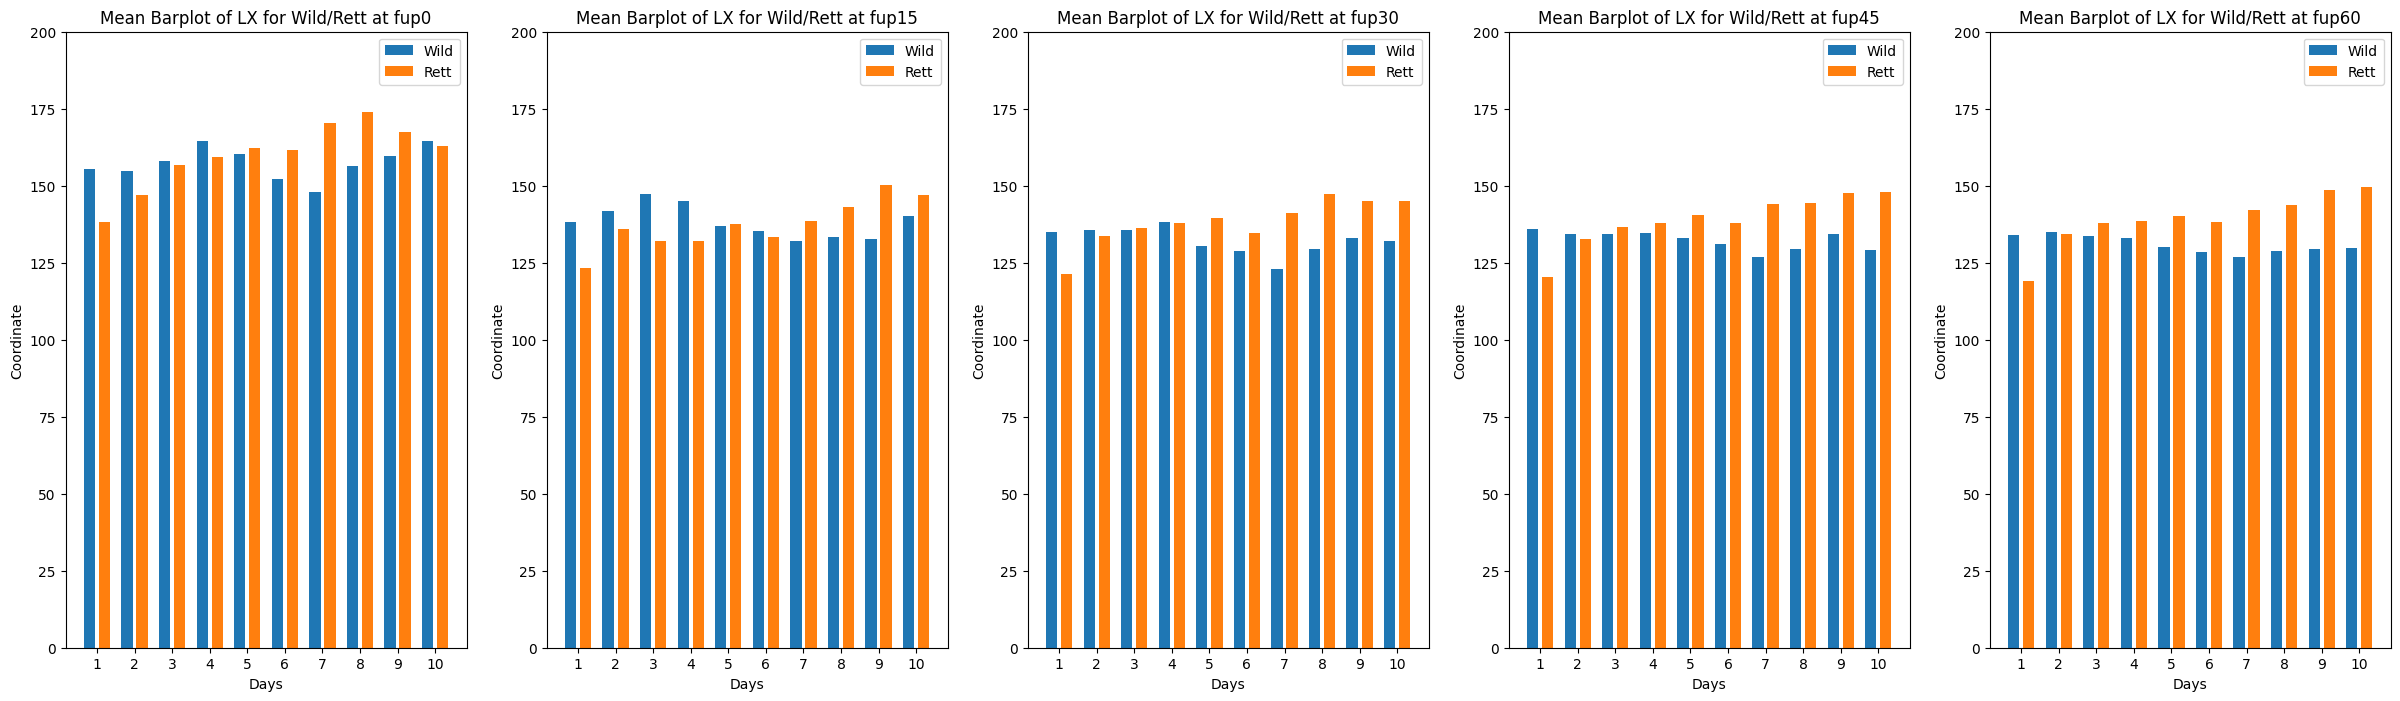

In [ ]:
mean_plots(up_list, df_mean_wild_lx, df_mean_rett_lx, 'LX')

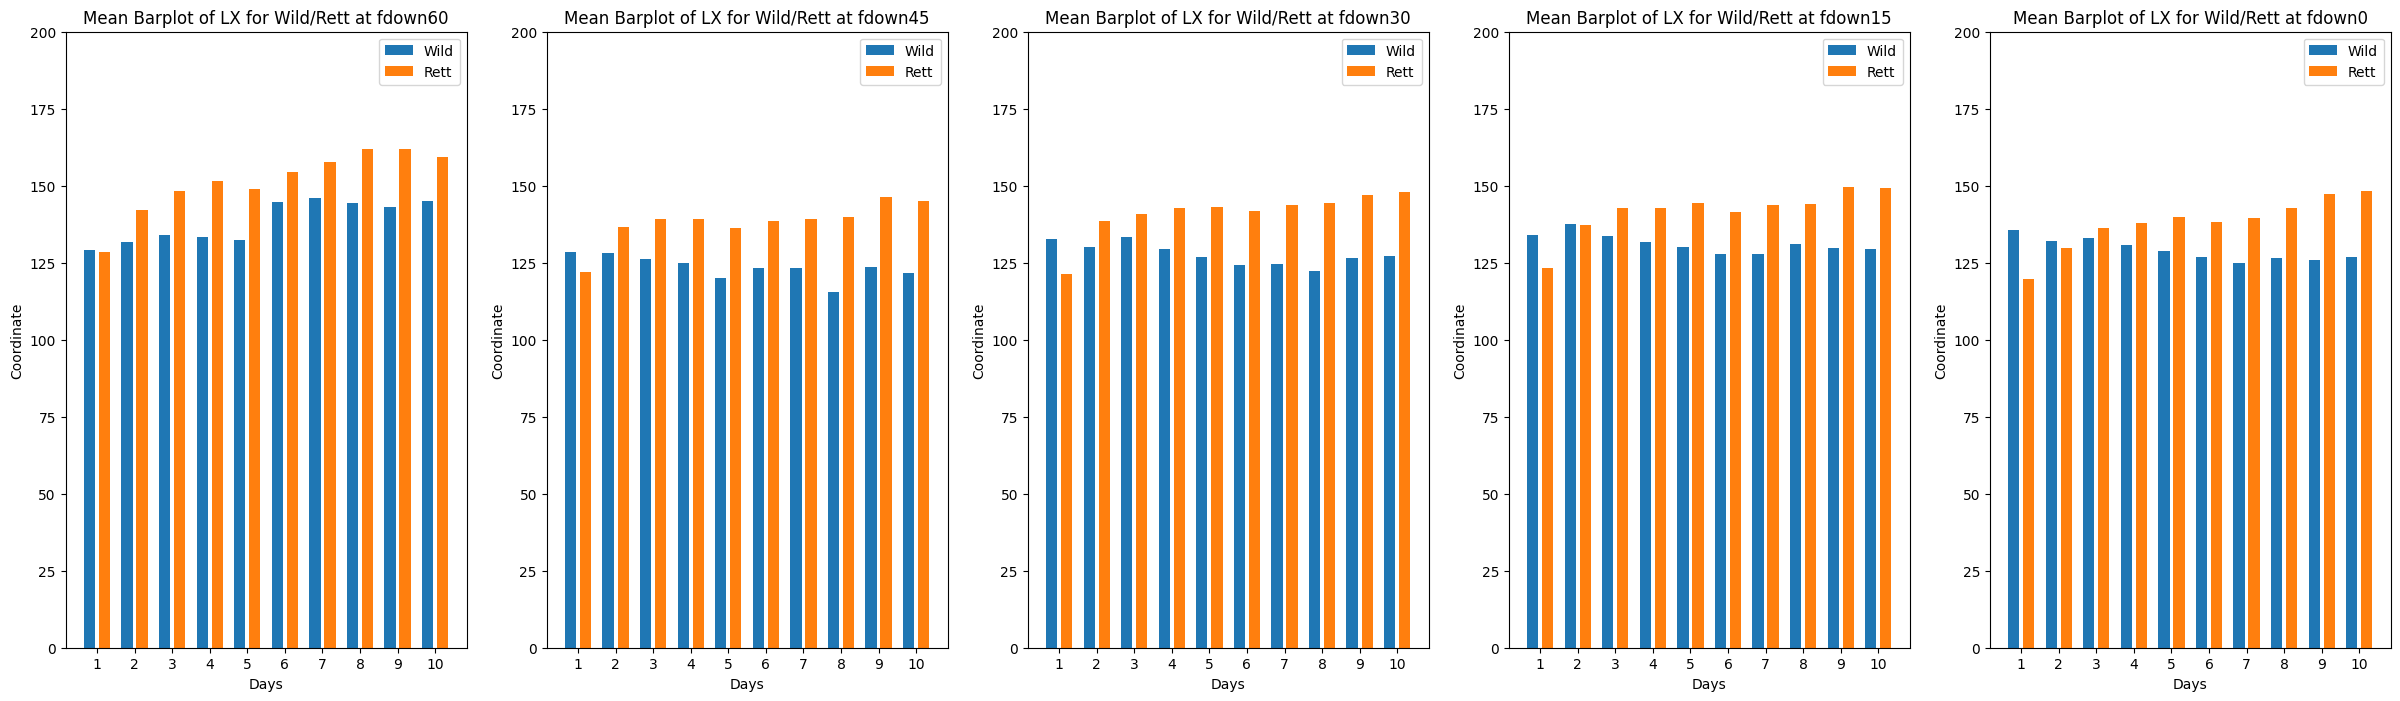

In [ ]:
mean_plots(down_list, df_mean_wild_lx, df_mean_rett_lx, 'LX')

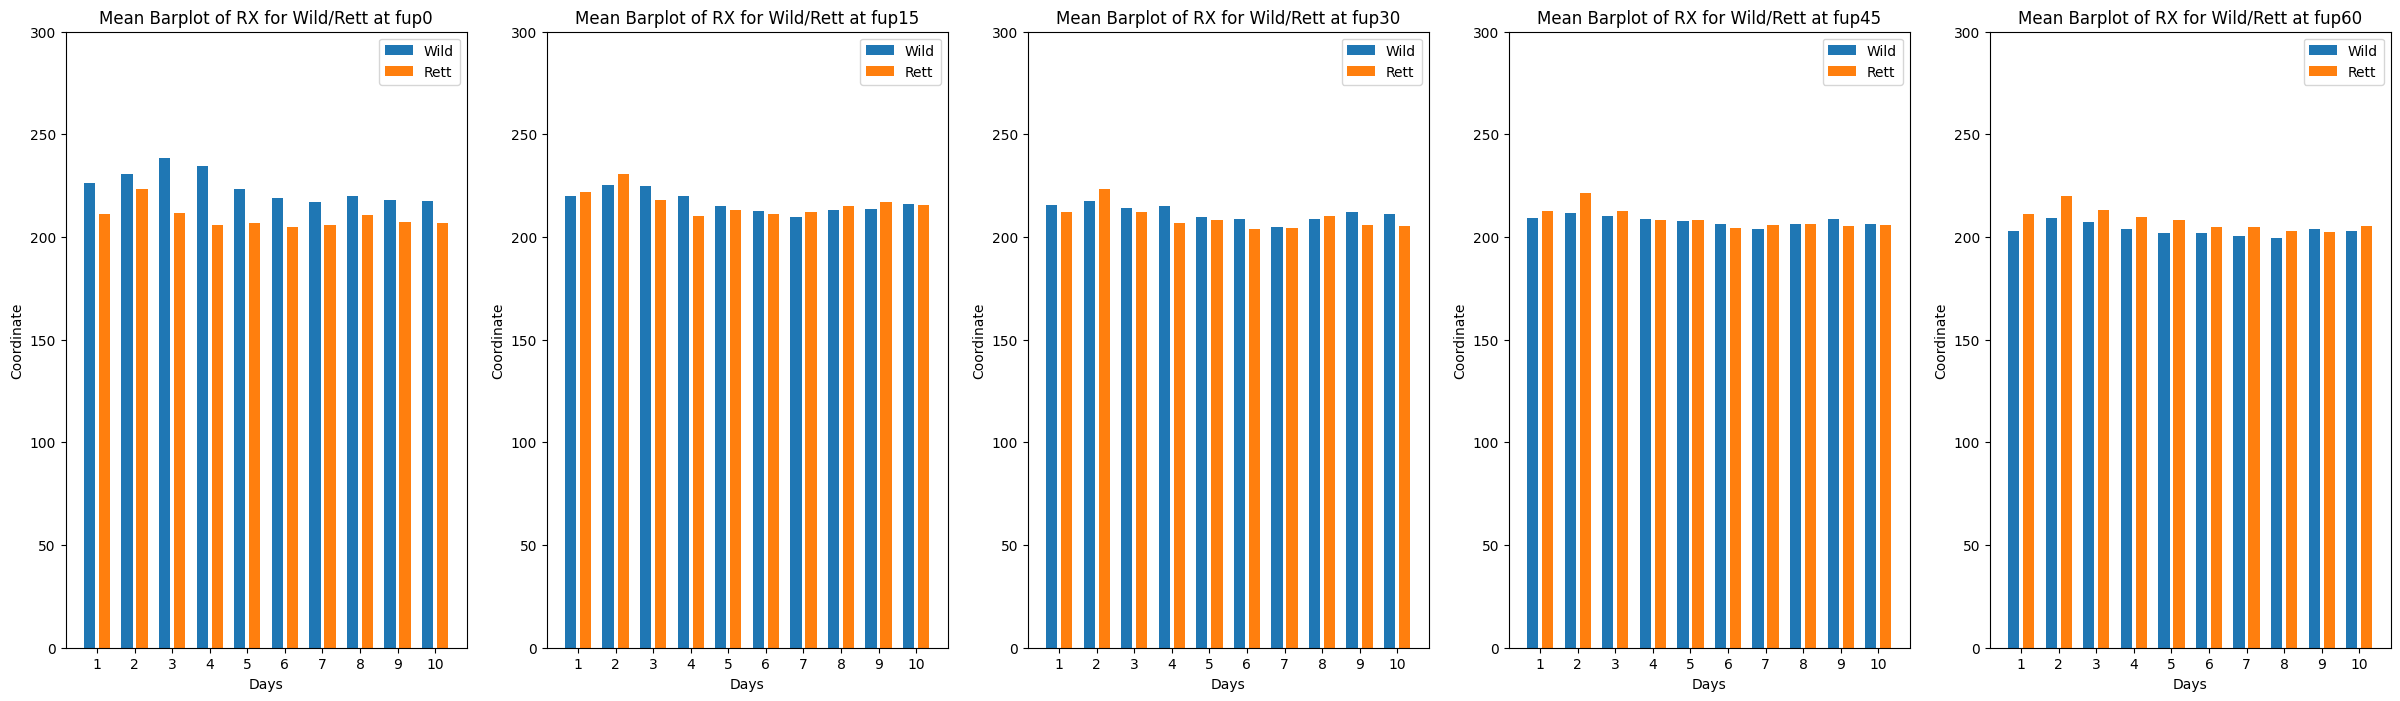

In [ ]:
mean_plots(up_list, df_mean_wild_rx, df_mean_rett_rx, 'RX')

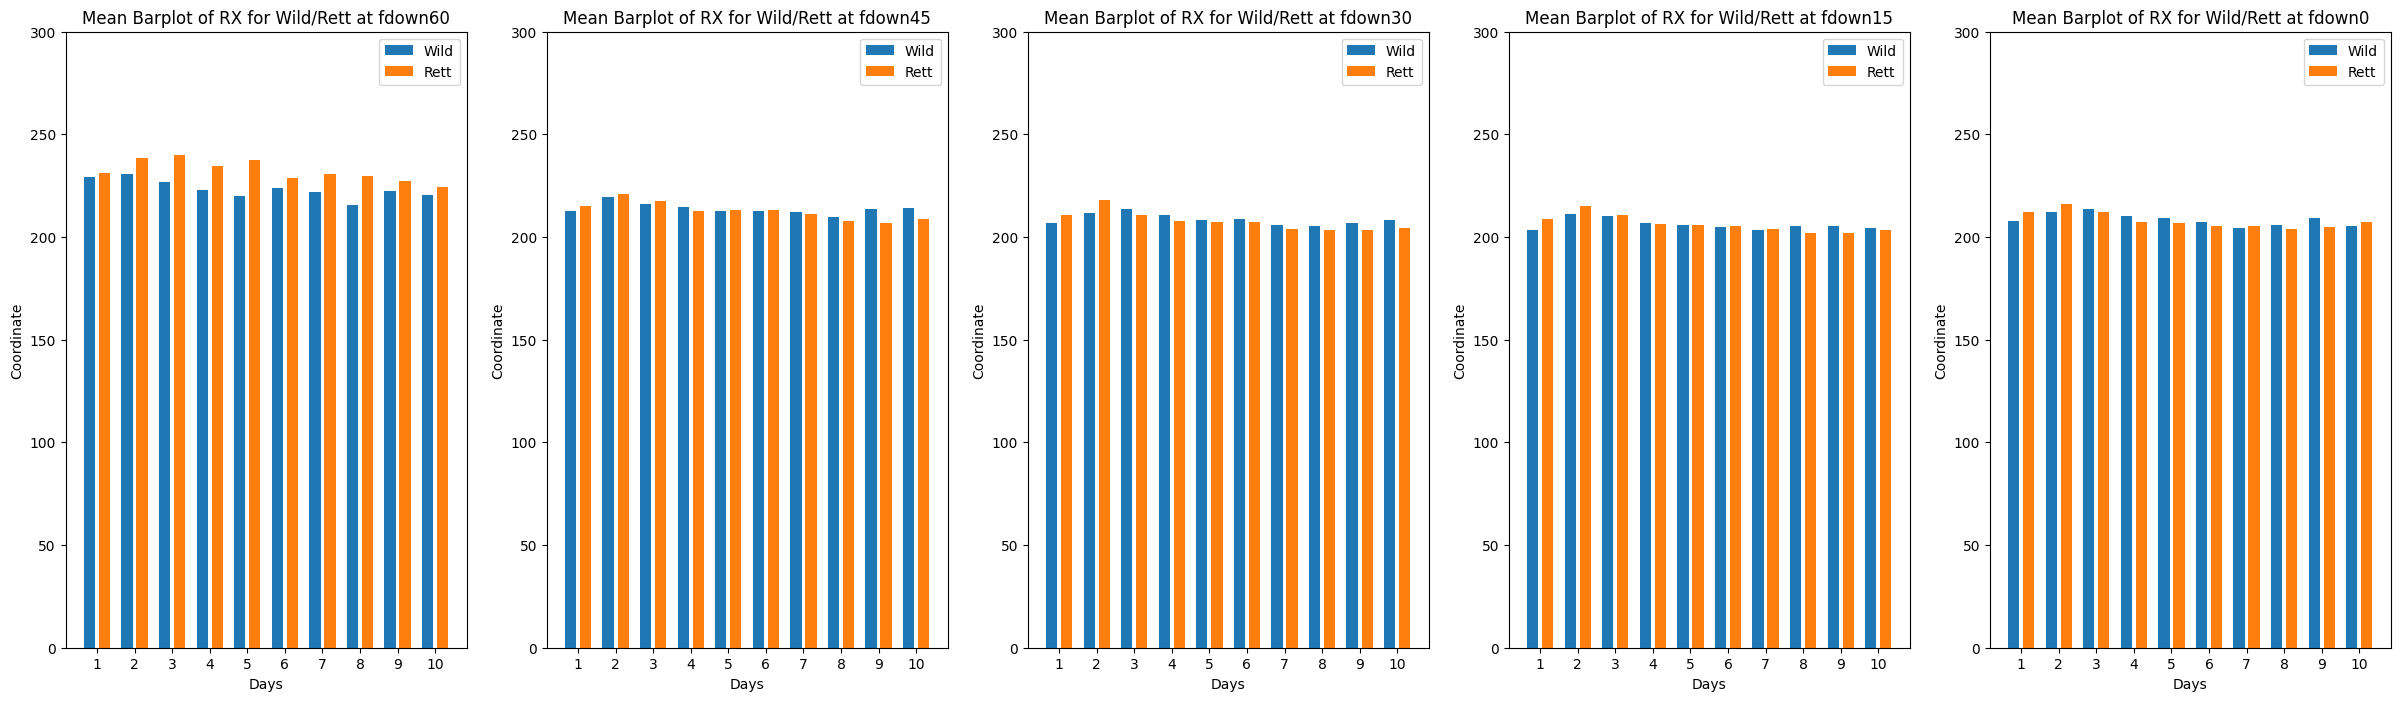

In [ ]:
mean_plots(down_list, df_mean_wild_rx, df_mean_rett_rx, 'RX')

## Variance

In [ ]:
up_list = ['fup0','fup15','fup30','fup45','fup60']
down_list = ['fdown60','fdown45','fdown30','fdown15','fdown0']

def variance_boxplots(wild, rett, pos, speed):

  ll_wild = []
  for ii in range(0, len(wild.columns)):
    d = wild.iloc[:,ii]
    ll_wild.append(d)

  ll_rett = []
  for ii in range(0, len(rett.columns)):
    d = rett.iloc[:,ii]
    ll_rett.append(d)


  fig, axs = plt.subplots(1,2, figsize=(8, 6))
  fig.suptitle('Boxplot of ' + pos + ' for Wild/Rett at '+ speed)
  axs[0].boxplot(ll_wild)
  axs[0].set_ylim(0, 300)
  axs[0].set_title('Wild')
  axs[1].boxplot(ll_rett)
  axs[1].set_ylim(0, 300)
  axs[1].set_title('Rett')
  plt.show()

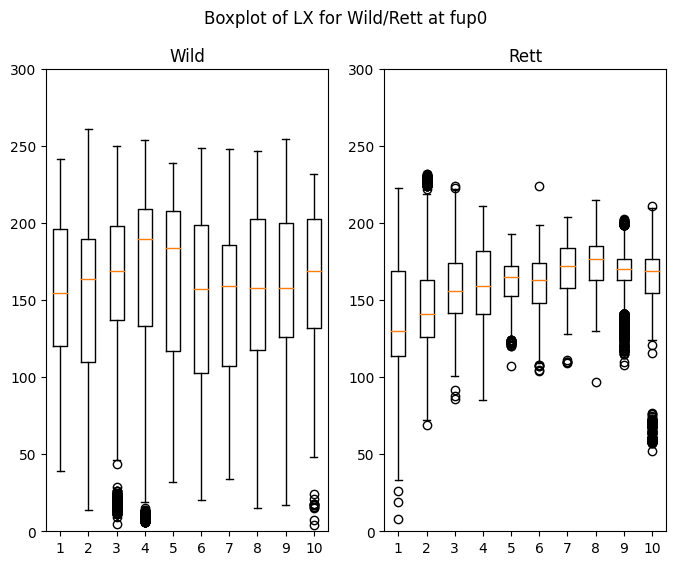

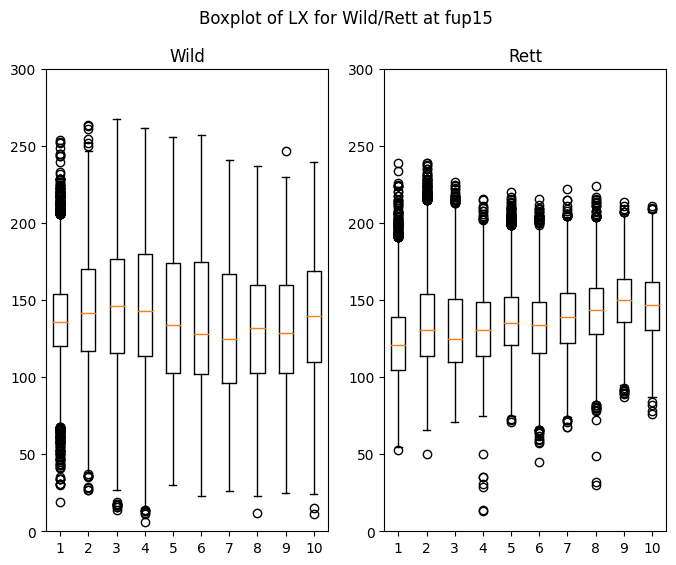

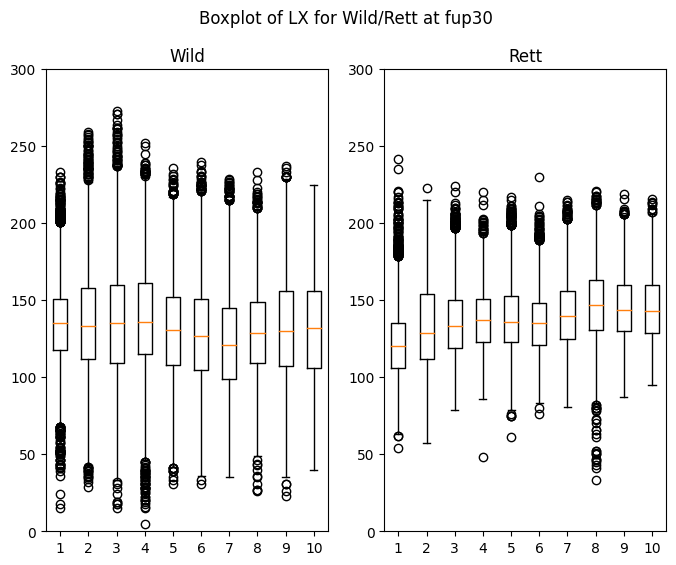

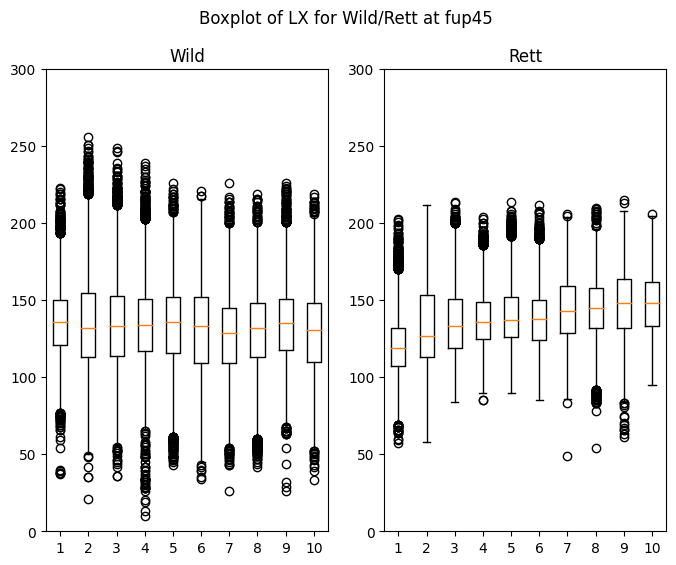

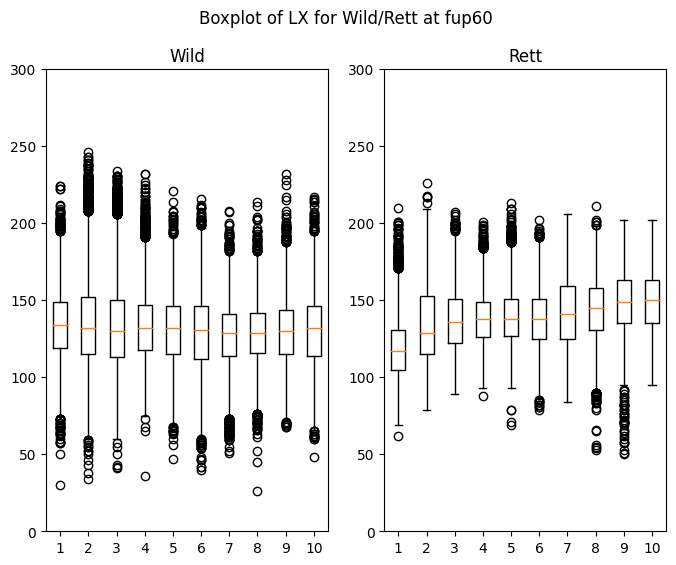

In [ ]:
variance_boxplots(wild_fup0_lx, rett_fup0_lx, 'LX', 'fup0')
variance_boxplots(wild_fup15_lx, rett_fup15_lx, 'LX', 'fup15')
variance_boxplots(wild_fup30_lx, rett_fup30_lx, 'LX', 'fup30')
variance_boxplots(wild_fup45_lx, rett_fup45_lx, 'LX', 'fup45')
variance_boxplots(wild_fup60_lx, rett_fup60_lx, 'LX', 'fup60')

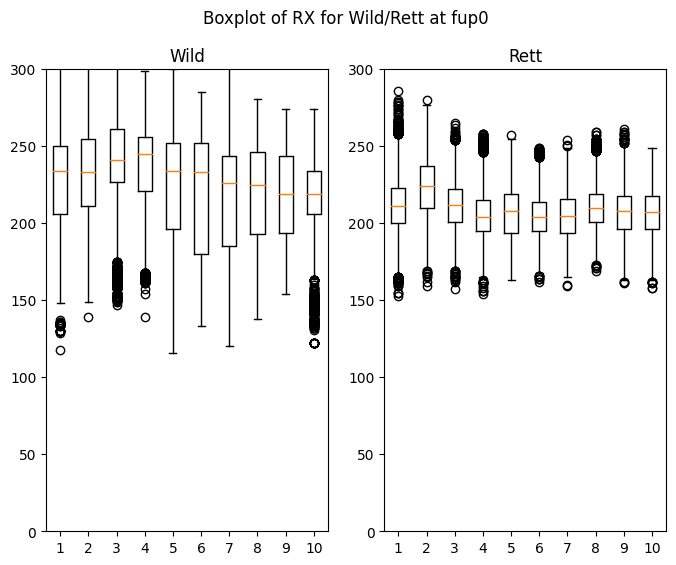

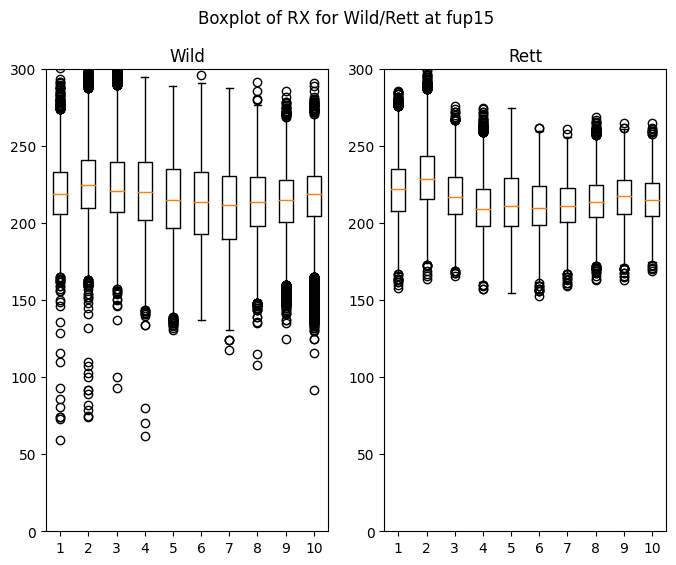

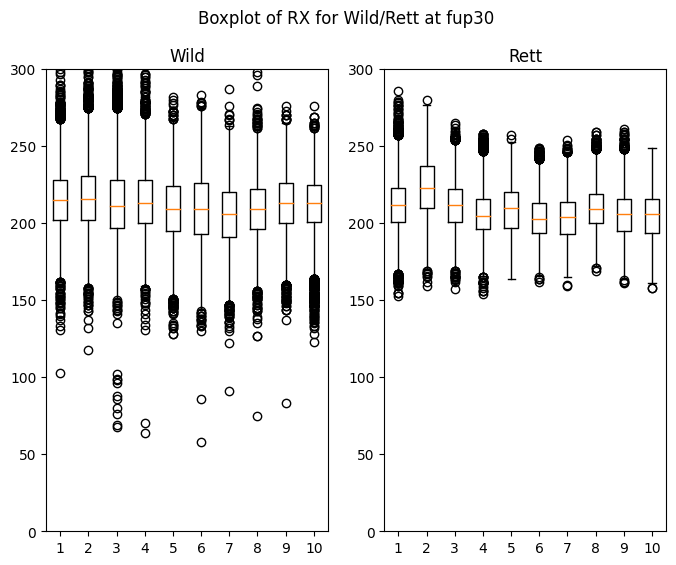

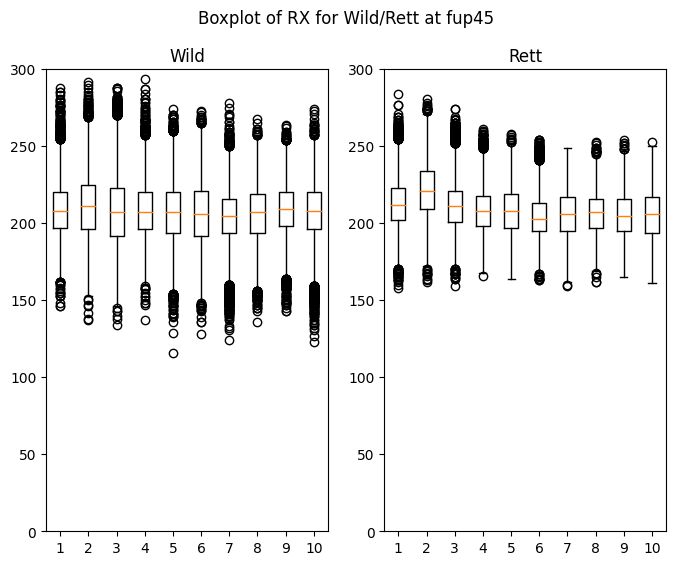

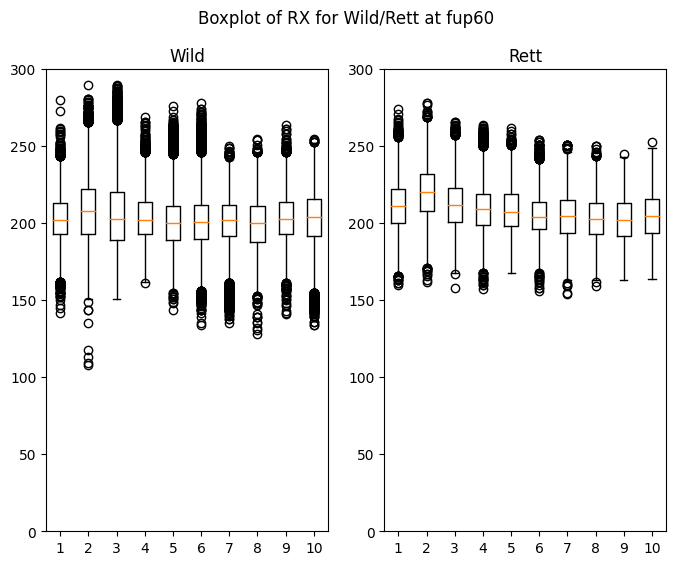

In [ ]:
variance_boxplots(wild_fup0_rx, rett_fup0_rx, 'RX', 'fup0')
variance_boxplots(wild_fup15_rx, rett_fup15_rx, 'RX', 'fup15')
variance_boxplots(wild_fup30_rx, rett_fup30_rx, 'RX', 'fup30')
variance_boxplots(wild_fup45_rx, rett_fup45_rx, 'RX', 'fup45')
variance_boxplots(wild_fup60_rx, rett_fup60_rx, 'RX', 'fup60')

## Skew and Kurtosis

In [ ]:
from scipy.stats import skew

def skew_kurt(wild, rett, pos, speed):
  wild.hist(figsize=(12,8))
  plt.suptitle("Histogram of " + pos + " for Wild at " + speed)
  
  plt.show()

  rett.hist(figsize=(12,8))
  plt.suptitle('Histogram of ' + pos + " for Rett at " + speed)
  
  plt.show()

  skew_df = pd.DataFrame()
  wild_skew = []
  rett_skew = []
  wild_kurt = []
  rett_kurt = []

  for i in rett.columns:
    rett_skew.append(skew(rett[i]))
    rett_kurt.append(rett[i].kurtosis())
  for i in wild_fup0_lx.columns:
    wild_skew.append(skew(wild[i]))
    wild_kurt.append(wild[i].kurtosis())

  skew_df['Wild_Skew'] = wild_skew
  skew_df['Wild_Kurt'] = wild_kurt
  skew_df['Rett_Skew'] = rett_skew
  skew_df['Rett_Kurt'] = rett_kurt

  return skew_df


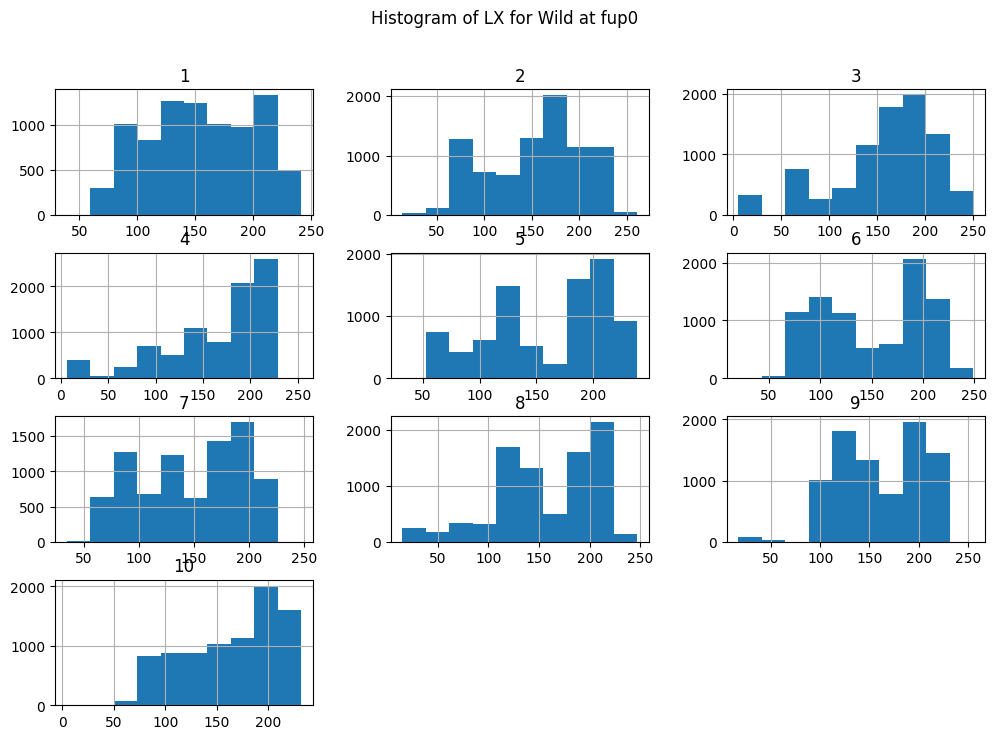

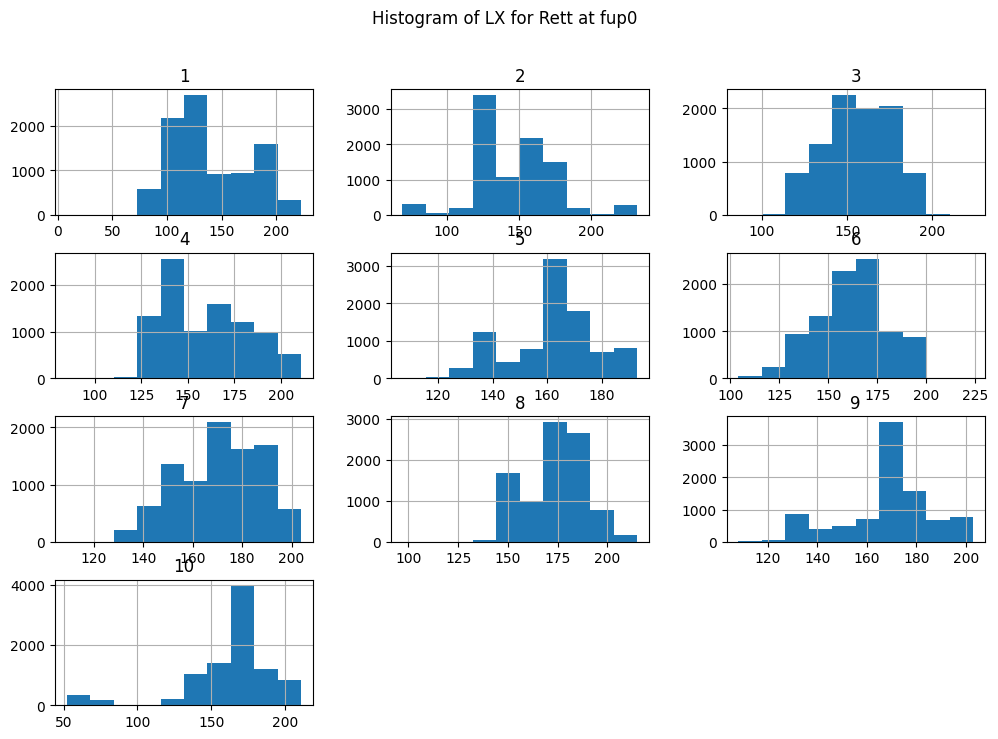

,Wild_Skew,Wild_Kurt,Rett_Skew,Rett_Kurt
0,-0.041689,-1.144096,0.356554,-0.936366
1,-0.313466,-0.893420,0.400480,0.670664
2,-0.981692,0.350034,-0.152199,-0.784342
3,-1.186292,0.615745,0.175482,-1.075903
4,-0.360144,-1.330137,-0.510336,-0.388341
5,-0.109542,-1.483689,-0.172165,-0.314380
6,-0.232283,-1.272185,-0.252111,-0.890426
7,-0.603788,-0.369245,-0.166001,-0.325821
8,-0.386724,-0.496534,-0.751582,0.329376
9,-0.430568,-0.970940,-1.784805,3.978706


In [ ]:
skew_kurt(wild_fup0_lx, rett_fup0_lx, 'LX', 'fup0')

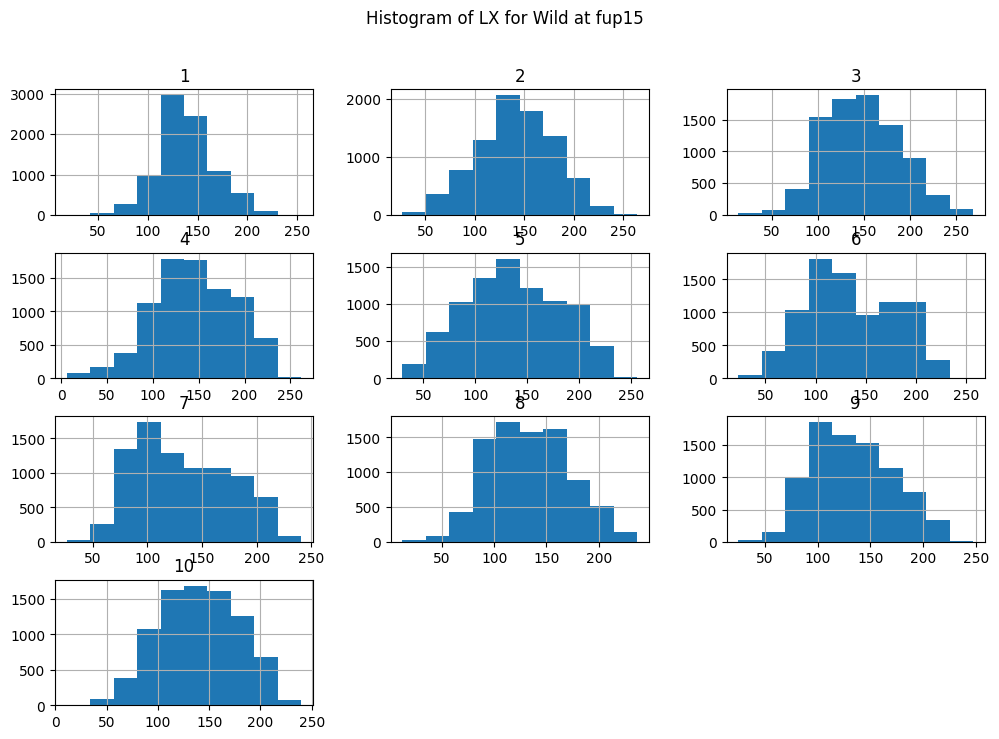

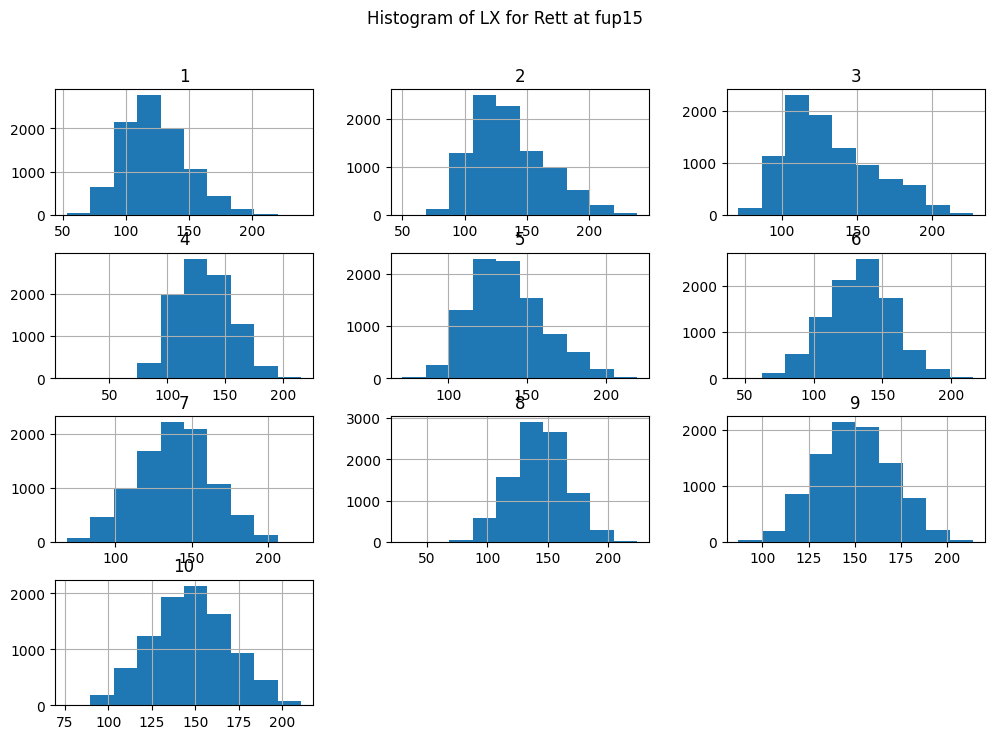

,Wild_Skew,Wild_Kurt,Rett_Skew,Rett_Kurt
0,0.174375,0.607594,0.555086,0.327452
1,-0.106057,-0.348544,0.648312,-0.036439
2,0.142338,-0.285033,0.658714,-0.329146
3,-0.151485,-0.394050,0.199032,-0.246204
4,0.030583,-0.822190,0.476121,-0.030759
5,0.157051,-0.925651,-0.022880,-0.119030
6,0.299665,-0.971376,0.004868,-0.239041
7,0.129299,-0.463006,-0.032888,-0.134444
8,0.243650,-0.677445,0.071832,-0.399801
9,-0.050546,-0.679364,0.017426,-0.385696


In [ ]:
skew_kurt(wild_fup15_lx, rett_fup15_lx, 'LX', 'fup15')

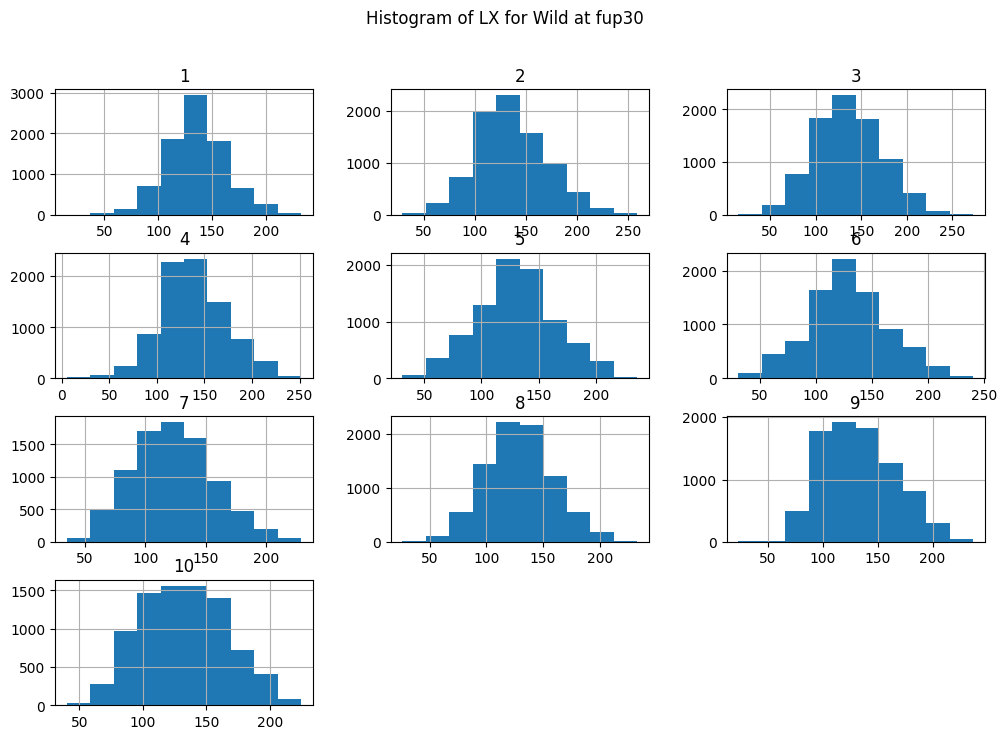

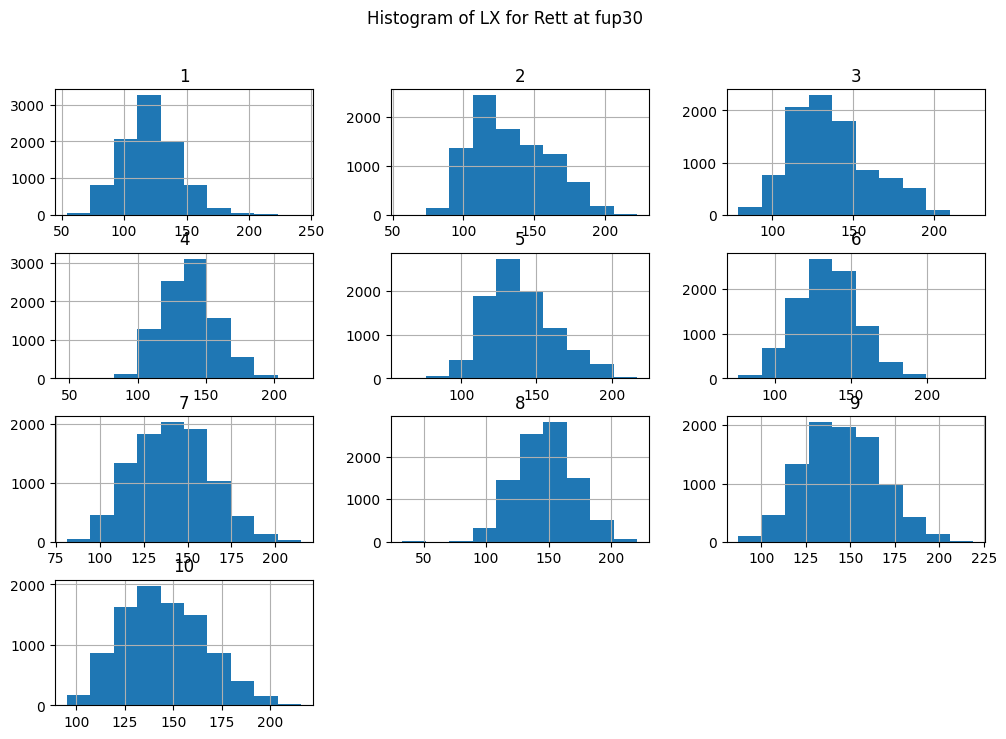

,Wild_Skew,Wild_Kurt,Rett_Skew,Rett_Kurt
0,0.091673,0.514751,0.431744,0.702300
1,0.310844,0.133393,0.438011,-0.609336
2,0.212628,-0.043431,0.552680,-0.208232
3,0.117730,0.150765,0.246452,-0.232239
4,0.056306,-0.191946,0.511754,-0.012879
5,0.125649,-0.119920,0.208119,0.028652
6,0.271614,-0.226634,0.227162,-0.281703
7,0.151343,-0.149942,0.013827,0.110915
8,0.354269,-0.487423,0.208627,-0.328726
9,0.133965,-0.610301,0.309333,-0.399944


In [ ]:
skew_kurt(wild_fup30_lx, rett_fup30_lx, 'LX', 'fup30')

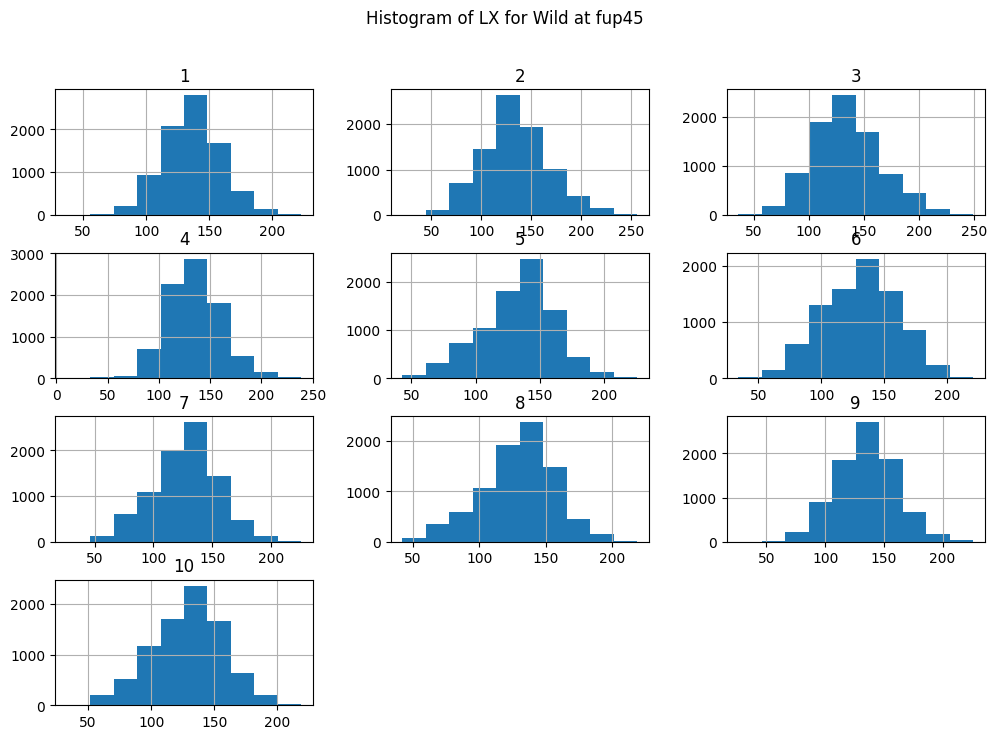

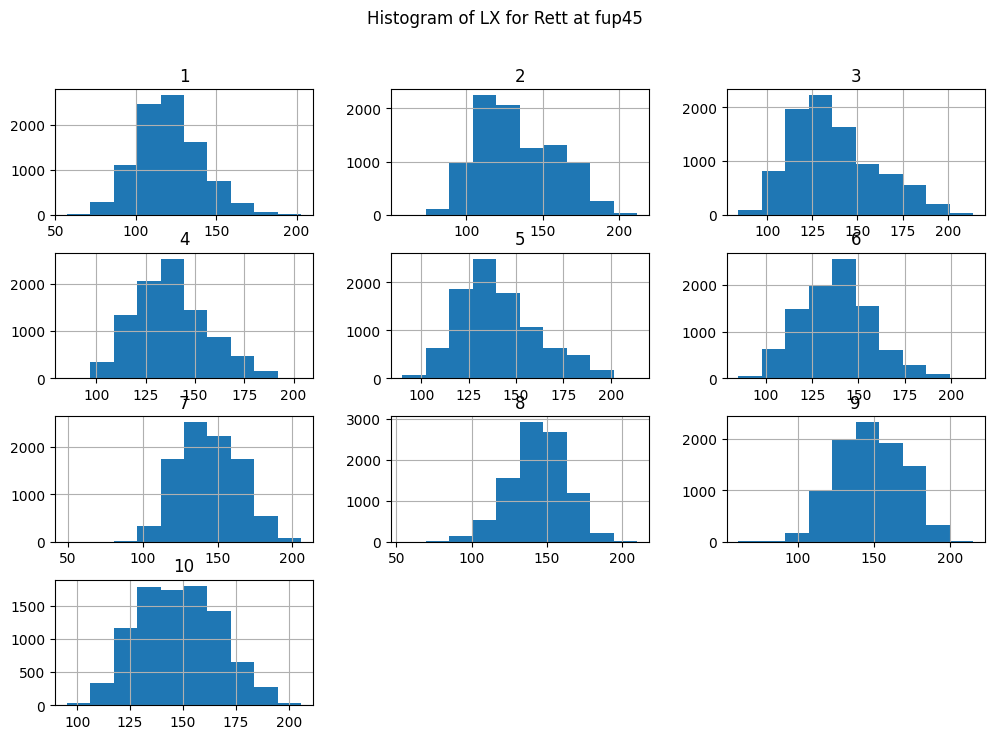

,Wild_Skew,Wild_Kurt,Rett_Skew,Rett_Kurt
0,0.083110,0.325550,0.378336,0.340759
1,0.311308,0.174127,0.383773,-0.715886
2,0.320500,0.040218,0.598158,-0.259325
3,0.116278,0.852521,0.429465,-0.093857
4,-0.293339,0.023232,0.614982,-0.000348
5,-0.093520,-0.389419,0.258179,0.012562
6,-0.142427,0.008461,0.149728,-0.428862
7,-0.334338,0.139376,-0.176855,0.093007
8,0.056839,0.158352,-0.022864,-0.531149
9,-0.159497,-0.112328,0.133194,-0.585379


In [ ]:
skew_kurt(wild_fup45_lx, rett_fup45_lx, 'LX', 'fup45')

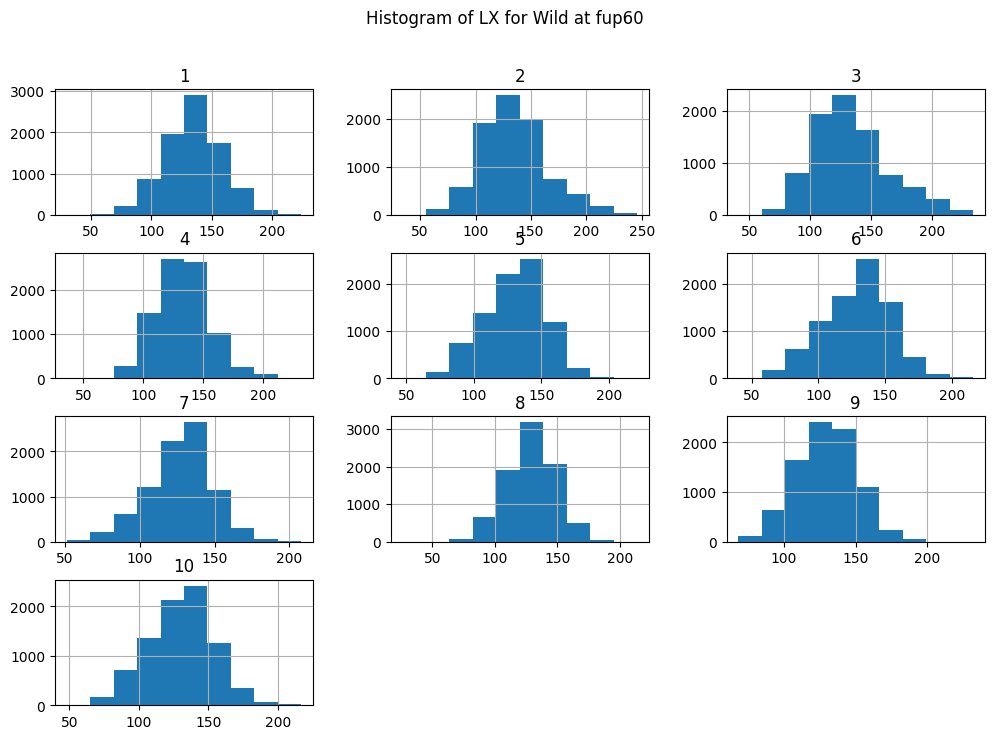

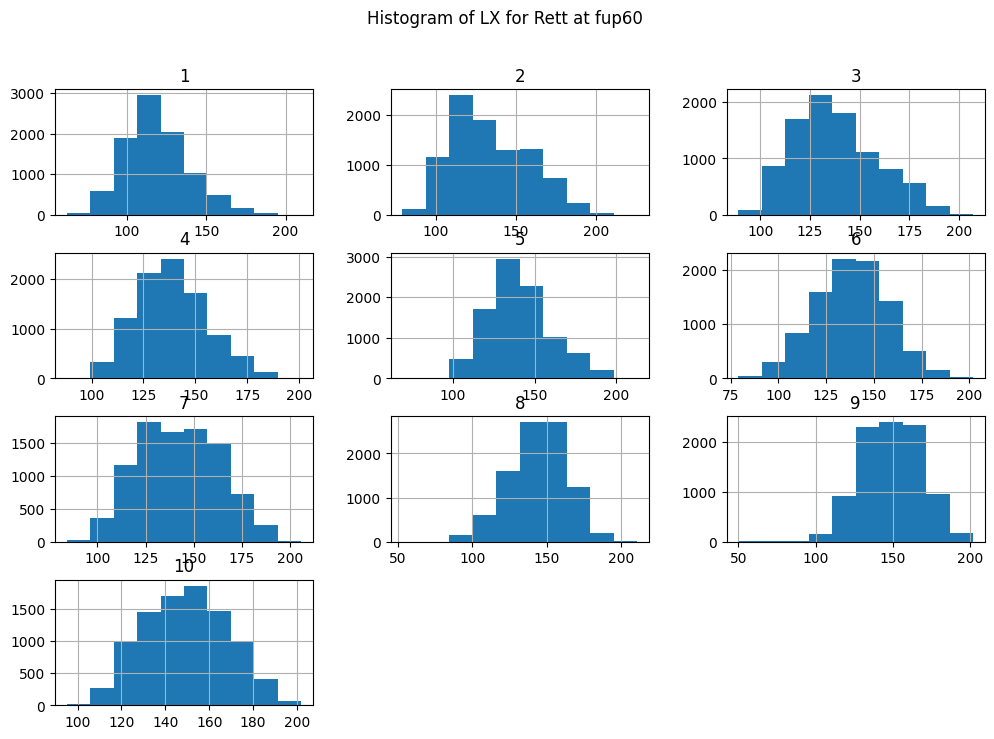

,Wild_Skew,Wild_Kurt,Rett_Skew,Rett_Kurt
0,-0.003820,0.090315,0.538732,0.461251
1,0.532100,0.462517,0.464458,-0.567178
2,0.587653,0.111297,0.443893,-0.351321
3,0.419027,0.547418,0.337841,-0.120460
4,-0.188332,-0.183418,0.511970,0.072257
5,-0.216461,-0.050146,-0.033419,-0.235129
6,-0.277774,0.207380,0.133774,-0.734442
7,-0.045701,0.223783,-0.260620,0.003686
8,0.069865,0.157647,-0.268019,0.257618
9,-0.099291,-0.111192,0.038229,-0.640523


In [ ]:
skew_kurt(wild_fup60_lx, rett_fup60_lx, 'LX', 'fup60')

In [ ]:
wild_up_lx = [wild_fup0_lx, wild_fup15_lx, wild_fup30_lx, wild_fup45_lx, wild_fup60_lx]
rett_up_lx = [rett_fup0_lx, rett_fup15_lx, rett_fup30_lx, rett_fup45_lx, rett_fup60_lx]

wild_up_rx = [wild_fup0_rx, wild_fup15_rx, wild_fup30_rx, wild_fup45_rx, wild_fup60_rx]
rett_up_rx = [rett_fup0_rx, rett_fup15_rx, rett_fup30_rx, rett_fup45_rx, rett_fup60_rx]